In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

os.makedirs("Graph", exist_ok=True)

## Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,1,6,14,6,6,1,1,10,2,1
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,6,11,1,6,1,4,4,1,13,0
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,1,4,21,12,1,16,10,4,9,0
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,13,12,2,4,2,7,1,2,11,1
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,12,2,2,4,1,3,1,11,15,1


In [11]:
df.columns

Index(['id', 'last_price', 'mid', 'opened_position_qty ',
       'closed_position_qty', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'y', 'return'],
      dtype='object')

In [3]:
df['return'] = df.mid.pct_change().shift(-1)
df = df.iloc[:-1,:]
df.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y,return
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,6,14,6,6,1,1,10,2,1,0.000208
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,11,1,6,1,4,4,1,13,0,0.000234
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,4,21,12,1,16,10,4,9,0,-0.000234
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,12,2,4,2,7,1,2,11,1,-0.000078
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,2,2,4,1,3,1,11,15,1,0.000286


In [4]:
df['y'] = (np.sign(df['return'])+1).astype(np.int32)
df

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y,return
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,6,14,6,6,1,1,10,2,2,0.000208
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,11,1,6,1,4,4,1,13,2,0.000234
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,4,21,12,1,16,10,4,9,0,-0.000234
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,12,2,4,2,7,1,2,11,0,-0.000078
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,2,2,4,1,3,1,11,15,2,0.000286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592374,592374,4109.4,4109.8,6.0,2.0,8.0,4,4109.4,4109.2,4109.0,...,2,2,6,1,2,3,10,7,2,0.000122
592375,592375,4110.2,4110.3,1.0,1.0,2.0,1,4110.2,4110.0,4109.4,...,1,3,2,2,3,10,7,7,2,0.000049
592376,592376,4109.4,4110.5,6.0,5.0,11.0,1,4109.2,4109.0,4108.6,...,2,6,5,3,9,7,7,5,1,0.000000
592377,592377,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,...,2,6,5,3,9,7,7,5,1,0.000000


In [5]:
idx = int(df.shape[0] * 0.8)
train = df.iloc[:idx,:]
test = df.iloc[idx:,:]
test_return = test['return'].values
test_price = test['mid'].values
del train['return'], test['return']
test.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
473903,473903,4006.2,4006.2,NaN,NaN,0.0,0,4006.0,4005.8,4005.4,...,4,6,7,12,5,14,5,1,3,0
473904,473904,4006.0,4006.1,1.0,0.0,1.0,1,4006.0,4005.8,4005.4,...,4,6,7,12,1,5,14,5,1,0
473905,473905,4006.0,4005.9,1.0,0.0,1.0,1,4005.8,4005.4,4005.2,...,6,7,11,1,1,1,5,14,5,2
473906,473906,4005.8,4006.1,0.0,1.0,1.0,0,4006.0,4005.8,4005.4,...,3,6,8,11,1,5,14,5,1,0
473907,473907,4006.0,4006.0,1.0,0.0,1.0,1,4005.8,4005.4,4005.2,...,6,8,11,1,1,5,14,5,1,1


In [6]:
train_X, train_y = train.iloc[:,1:-1], train.iloc[:,-1]
test_X, test_y = test.iloc[:,1:-1], test.iloc[:,-1]
train_X.head()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,3841.0,...,8,1,6,14,6,6,1,1,10,2
1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,3842.0,...,7,6,11,1,6,1,4,4,1,13
2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,3843.0,...,3,1,4,21,12,1,16,10,4,9
3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,3842.0,...,10,13,12,2,4,2,7,1,2,11
4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,3841.8,...,14,12,2,2,4,1,3,1,11,15


## Preprocessing the dataset

In [7]:
def preprocess(data):
    # fill NaN
    data['opened_position_qty '].fillna(np.floor(data['transacted_qty']/2), inplace = True)
    data['closed_position_qty'].fillna(np.ceil(data['transacted_qty']/2), inplace = True)
    
    # add some features
    data['diff'] = data['ask1'] - data['bid1']
    data['diff_vol'] = data['bid1vol'] - data['ask1vol']
    data['pot_vol'] = data['bid1vol'] + data['ask1vol']
    data['frac_price'] = data['last_price'] / data['mid']
    data['ask_spread'] = data['ask1'] / data['ask5']
    data['ask_vol_spread'] = data[['ask1vol', 'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol']].min(axis=1) / data[['ask1vol', 'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol']].max(axis=1)
    data['bid_spread'] = data['bid1'] / data['bid5']
    data['bid_vol_spread'] = data[['bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol']].min(axis=1) / data[['bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol']].max(axis=1)
    
    # Convert the relevant portion of the DataFrame to a NumPy array for fast computation
    features_array = data.values
    # Compute the mean and std dev row-wise
    means = np.mean(features_array, axis=1, keepdims=True)
    std_devs = np.std(features_array, axis=1, keepdims=True)
    # Apply z-score standardization
    standardized_features = (features_array - means) / std_devs
    # Replace NaN values in the standardized array (resulting from division by zero if std_dev is 0)
    standardized_features = np.nan_to_num(standardized_features)
    # Put the standardized data back into the DataFrame
    data[:] = standardized_features

    return data

In [8]:
train_X, test_X = preprocess(train_X), preprocess(test_X)
train_X.head()

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,ask4vol,ask5vol,diff,diff_vol,pot_vol,frac_price,ask_spread,ask_vol_spread,bid_spread,bid_vol_spread
0,1.353865,1.353974,-0.717610,-0.717064,-0.689199,-0.745475,1.353865,1.353647,1.353537,1.353100,...,-0.740011,-0.744382,-0.745256,-0.744382,-0.737826,-0.744928,-0.744928,-0.745420,-0.744928,-0.745436
1,1.353683,1.354010,-0.738699,-0.715249,-0.711977,-0.765421,1.353792,1.353683,1.353465,1.353247,...,-0.741426,-0.734882,-0.741535,-0.738699,-0.737608,-0.741426,-0.741426,-0.741929,-0.741426,-0.741922
2,1.353754,1.353918,-0.739389,-0.701202,-0.697384,-0.780848,1.353645,1.353536,1.353318,1.353209,...,-0.741025,-0.738298,-0.742662,-0.742116,-0.741025,-0.742662,-0.742662,-0.743173,-0.742662,-0.743181
3,1.354222,1.354004,-0.740175,-0.723270,-0.721634,-0.758170,1.353786,1.353677,1.353459,1.353241,...,-0.740720,-0.735812,-0.741374,-0.737448,-0.735267,-0.741265,-0.741265,-0.741761,-0.741265,-0.741727
4,1.353975,1.353920,-0.740463,-0.721374,-0.719738,-0.761188,1.353757,1.353539,1.353320,1.353211,...,-0.736100,-0.733918,-0.741772,-0.735009,-0.733918,-0.741554,-0.741554,-0.742063,-0.741554,-0.742021


In [12]:
print(f"The number of training data we have: {train_X.shape[0]}")
print(f"The number of testing data we have: {test_X.shape[0]}")

The number of training data we have: 473903
The number of testing data we have: 118476


## Machine Learning Methods:

The provided Python code defines a set of classes and functions for training, evaluating, and saving machine learning models. Here's a breakdown of its functionality:

1. **FutureClassifier Class:**
   - This class serves as a wrapper for various classifier models from different libraries like scikit-learn, LightGBM, XGBoost, and CatBoost.
   - It provides methods for fitting models, making predictions, tuning hyperparameters, saving/loading models, and performing cross-validation.

2. **evaluate_models_cv Function:**
   - This function evaluates multiple models using cross-validation.
   - It iterates over each model specified in the `models` parameter and computes accuracy and ROC AUC scores using cross-validation.

3. **train_and_evaluate Function:**
   - This function trains and evaluates a single model.
   - It splits the data into training and testing sets, checks if the model has been previously saved, and either loads the saved model or fits a new one.
   - After making predictions on the test set, it calculates and prints the accuracy and ROC AUC scores.


In [9]:
import os
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score
import joblib


class FutureClassifier:
    def __init__(self):
        # Initialize the models dictionary with various classifier models
        self.models = {
            'rf': RandomForestClassifier(n_jobs=-1),
            'adaboost': AdaBoostClassifier(),
            'lightgbm': LGBMClassifier(n_jobs=-1),
            'xgboost': XGBClassifier(),
            'catboost': CatBoostClassifier(verbose=0),
        }
        self.best_models = {}

    def fit(self, X_train, y_train, model_name, **kwargs):
        # Fit the specified model with the training data and hyperparameters
        model = self.models[model_name]
        model.set_params(**kwargs)
        model.fit(X_train, y_train)

    def predict(self, X_test, model_name):
        # Make predictions using the specified model
        model = self.models[model_name]
        return model.predict(X_test)
    
    def predict_proba(self, X_test, model_name):
        # Make predictions using the specified model
        model = self.models[model_name]
        return model.predict_proba(X_test)

    def get_model(self, model_name):
        # Get the specified model
        return self.models[model_name]

    def tune_hyperparameters(self, X_train, y_train, model_name, param_grid, cv=5):
        # Perform hyperparameter tuning using GridSearchCV
        model = self.models[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=cv)
        grid_search.fit(X_train, y_train)
        self.best_models[model_name] = grid_search.best_estimator_

    def predict_with_best_model(self, X_test, model_name):
        # Make predictions using the best model obtained from hyperparameter tuning
        best_model = self.best_models[model_name]
        return best_model.predict(X_test)

    def save_model(self, model_name, file_path):
        # Save the specified model to a file
        joblib.dump(self.models[model_name], file_path)

    def load_model(self, model_name, file_path):
        # Load the specified model from a file
        self.models[model_name] = joblib.load(file_path)

    def cross_validate(self, X, y, model_name, cv=5, **kwargs):
        # Perform cross-validation for the specified model
        model = self.models[model_name]
        model.set_params(**kwargs)
        accuracies = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        rocaucs = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        return accuracies, rocaucs
    

def evaluate_models_cv(X, y, models, cv=5, **kwargs):
    # Evaluate models using cross-validation
    results = {}
    for model_name in models:
        predictor = FutureClassifier()
        accuracies, rocaucs = predictor.cross_validate(X, y, model_name, cv=cv, **kwargs)
        results[model_name] = {
            'Accuracy': np.mean(accuracies),
            'Accuracy Std': np.std(accuracies),
            'ROCAUC': np.mean(rocaucs),
            'ROCAUC Std': np.std(rocaucs)
        }
    return results


def train_and_evaluate(X, y, model_name, test_size=0.2, **kwargs):
    # Train and evaluate a single model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model_folder = "Model-test"
    os.makedirs(model_folder, exist_ok=True)
    model_path = os.path.join(model_folder, f"{model_name}.m")
    predictor = FutureClassifier()
    if os.path.exists(model_path):
        predictor.load_model(model_name, model_path)
    else:
        predictor.fit(X_train, y_train, model_name, **kwargs)
        predictor.save_model(model_name, model_path)
    y_pred = predictor.predict(X_test, model_name)
    y_pred_proba = predictor.predict_proba(X_test, model_name)
    accuracy = accuracy_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    print(f'Model {model_name}: Accuracy - {accuracy}, ROC_AUC - {rocauc}')

In [64]:
train_and_evaluate(train_X, train_y, 'adaboost')
# train_and_evaluate(train_X, train_y, 'lightgbm')
# train_and_evaluate(train_X, train_y, 'xgboost')
# train_and_evaluate(train_X, train_y, 'catboost')
# train_and_evaluate(train_X, train_y, 'rf')

Model adaboost: Accuracy - 0.4858674206855804, ROC_AUC - 0.6526223074305595


## Deep Learning Methods:

The provided Python code defines a set of classes and functions for training, evaluating, and saving deep learning models. Here's a breakdown of its functionality:

1. **EarlyStopping Class:**
   - This class implements early stopping during model training based on the validation loss.
   - It tracks the validation loss and stops training if the loss does not improve for a certain number of epochs.

2. **Data Class:**
   - This class is a custom dataset class for creating batches of data.
   - It is used to prepare data for training and validation.

3. **get_DL_data Function:**
   - This function preprocesses the data, splits it into training and validation sets, and creates PyTorch DataLoader objects for batch processing.

4. **initialize_model Function:**
   - This function initializes the neural network model and loss function based on the provided arguments.

5. **train Function:**
   - This function trains the neural network model using the provided data loaders and criterion (loss function).
   - It implements early stopping to prevent overfitting.

6. **evaluate Function:**
   - This function evaluates the trained model on the validation set and calculates metrics such as loss and accuracy.

7. **train_and_evaluate_dl Function:**
   - This function orchestrates the training and evaluation process.
   - It loads the existing model if available or trains a new one and saves it.
   - Then, it evaluates the model on the validation set and returns the predictions.


In [10]:
import os
import sys
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import trange
import math
import torch.nn.functional as F


from LSTM import *
from GRU import *
from ALSTM import *
from TCN import *
from GATS import *
from SFM import *
from Transformer import Transformer
# from Localformer import Localformer
# from Deeplob import deeplob
# from AdaRNN import AdaRNN
# from Sandwich import SandwichModel


BATCH_SIZE = 1024
SEQ_LEN = 60
LEARNING_RATE = 1e-3
MOMENTUM = 0.9
WEIGHT_DECAY = 5e-5
MAX_EPOCH = 100
TEST_SIZE = 0.2
VALID_SIZE = 0.2
RANDOM_SEED = 42
PATIENCE = 5


if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# device = "cpu"


# define early stopping
class EarlyStopping:
    def __init__(self, patience=7, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


class Data(Dataset):
    """
    The simple Dataset object from torch that can produce reshuffled batchs of data
    """
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    

def get_DL_data(X: pd.DataFrame, y: pd.Series, valid_size=VALID_SIZE):

    X, y = torch.from_numpy(X.values), torch.from_numpy(y.values)
    X = X.unfold(0, SEQ_LEN, 1).permute(0, 2, 1)
    y = y[SEQ_LEN-1:]

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size, random_state=RANDOM_SEED)

    train_dataset, valid_dataset = Data(X_train, y_train), Data(X_valid, y_valid)
    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

    return X_train.size(-1), train_dataloader, valid_dataloader


def initialize_model(model_name: str, loss_name: str, input_size: int, method: str):

    output_size = 3

    if model_name == 'LSTM':
        model = LSTMModel(input_size=input_size, output_size=output_size)
    elif model_name == 'GRU':
        model = GRUModel(input_size=input_size, output_size=output_size)
    elif model_name == 'ALSTM':
        model = ALSTMModel(input_size=input_size, output_size=output_size)
    elif model_name == 'TCN':
        model = TCNModel(num_input=SEQ_LEN, output_size=output_size, num_feature=input_size)
    elif model_name == 'GATS':
        model = GATModel(d_feat=input_size, output_size=output_size)
    elif model_name == 'SFM':
        model = SFMModel(d_feat=input_size, output_dim=output_size)
    elif model_name == 'Transformer':
        model = Transformer(d_feat=input_size, d_model=8, nhead=4, dropout=0.2, output_size=output_size)
    else:
        raise ValueError(f'Parameter model_name should be LSTM/ALSTM/TCN/Transformer, get {model_name} instead')
    
    if loss_name == 'CrossEntropy':
        loss = nn.CrossEntropyLoss()
    else:
        raise ValueError(f'Parameter loss_name should be BCE, get {loss_name} instead')
    
    return model, loss


def train(model, train_dataloader, criterion, valid_dataloader=None, MAX_EPOCH=MAX_EPOCH, lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY, patience=10):

    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    print(f'{MAX_EPOCH} epochs to train: ')

    best_val_loss = math.inf
    best_model_state = None

    for epoch in range(1, MAX_EPOCH+1):

        Total_loss, Total_accuracy = 0, 0
        print(f'epoch {epoch}/{MAX_EPOCH}:')
        train_data_size = len(train_dataloader)
        model.train()

        with trange(train_data_size) as train_bar:
            for i in train_bar:
                x_train, y_train = next(iter(train_dataloader))
                x_train, y_train = x_train.float(), y_train.long()
                x_train, y_train = x_train.to(device), y_train.to(device)

                optimizer.zero_grad()

                optimizer.zero_grad()
                y_pred = model(x_train)

                # Convert logits to probabilities and get the class with the higher probability
                probs = torch.softmax(y_pred, dim=1)
                preds = torch.argmax(probs, dim=1)

                # Convert y_train to one-hot encoding
                y_train_one_hot = F.one_hot(y_train, num_classes=3).float()

                train_loss = criterion(y_pred, y_train_one_hot)

                Total_loss += train_loss.item()

                train_loss.backward()
                torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=3)
                optimizer.step()

                # Calculate accuracy and precision
                y_train_np = y_train.detach().cpu().numpy()
                Total_accuracy += accuracy_score(y_train_np, preds.cpu().numpy())

                # Update progress bar
                avg_loss = Total_loss / (i + 1)
                avg_accuracy = Total_accuracy / (i + 1)
                train_bar.set_postfix(loss=avg_loss, accuracy=avg_accuracy)

        if valid_dataloader is not None:
            model.eval()
            val_loss, val_acc = evaluate(model, valid_dataloader, criterion)
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = model.state_dict()
                print(f"New best model saved with validation loss: {best_val_loss}")
                print(f"New best model saved with validation accuracy: {val_acc}")

            early_stopping(val_loss)
            if early_stopping.early_stop:
                print("Early stopping")
                break

    return best_model_state


def evaluate(model, dataloader, criterion):

    print('Evaluating ...')
    test_data_size = len(dataloader)
    model.eval()

    Total_loss, Total_accuracy = 0, 0

    with trange(test_data_size) as test_bar:
        for i in test_bar:
            x_test, y_test = next(iter(dataloader))
            x_test, y_test = x_test.float(), y_test.long()
            x_test, y_test = x_test.to(device), y_test.to(device)

            y_pred = model(x_test)

            # Convert y_train to one-hot encoding
            y_test_one_hot = F.one_hot(y_test, num_classes=3).float()

            Loss = criterion(y_pred, y_test_one_hot).item()

            # Convert logits to probabilities and get the class with the higher probability
            probs = torch.softmax(y_pred, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Calculate accuracy and precision
            y_test_np = y_test.detach().cpu().numpy()
            Total_accuracy += accuracy_score(y_test_np, preds.cpu().numpy())

            Total_loss += Loss
            avg_loss = Total_loss / (i + 1)
            avg_accuracy = Total_accuracy / (i + 1)
            test_bar.set_postfix(loss=avg_loss, accuracy=avg_accuracy)

        return Total_loss / test_data_size, Total_accuracy / test_data_size
    

def train_and_evaluate_dl(X: pd.DataFrame, y: pd.Series, model_name: str, loss_name: str, method='classification'):
    if method not in ['classification', 'regression']:
        raise ValueError("method should be 'classification' or 'regression'")

    num_feature, train_dataloader, valid_dataloader = get_DL_data(X, y)

    model, loss = initialize_model(model_name, loss_name, num_feature, method=method)
    model.to(device)
    
    model_file_path = f"Model/{model_name}.pt"
    if os.path.exists(model_file_path):
        print(f"Loading existing model from {model_file_path}")
        model.load_state_dict(torch.load(model_file_path))
    else:
        print(f"Training new model and saving to {model_file_path}")
        best_model_state = train(model, train_dataloader, loss, valid_dataloader)
        model.load_state_dict(best_model_state)
        os.makedirs(os.path.dirname(model_file_path), exist_ok=True)
        torch.save(model.state_dict(), model_file_path)

    # Evaluate on test data
    model.eval()
    all_probs = []
    all_preds = []
    all_y = []
    with torch.no_grad():
        for x_test, y_test in valid_dataloader:
            x_test, y_test = x_test.float(), y_test.float()
            x_test, y_test = x_test.to(device), y_test.to(device)
            logits = model(x_test)

            if method == 'classification':
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
            elif method == 'regression':
                preds = logits.squeeze()
                preds = (preds >= 0.5).int()

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_y.extend(y_test.cpu().numpy())

    accuracy = accuracy_score(all_y, all_preds)
    print(f"Out of Sample Accuracy by {model_name} with {loss_name}: {accuracy}")

    return all_preds

In [10]:
model_name = 'LSTM'
# model_name = 'ALSTM'
# model_name = 'TCN'
# model_name = 'GATS'
# model_name = 'SFM'
# model_name = 'GRU'
# model_name = 'Transformer'

preds = train_and_evaluate_dl(train_X, train_y, model_name, 'CrossEntropy', 'classification')

Loading existing model from Model/LSTM.pt
Out of Sample Accuracy by LSTM with CrossEntropy: 0.5351327965896021


## Backtest Class:

The provided Python code defines a `Backtest` class for simulating and evaluating trading strategies. Here's an explanation of its functionality:

1. **Initialization:**
   - The `__init__` method initializes the backtest with parameters such as initial capital, commission rate, price data, return data, signal data, stop loss, stop gain, and patience.
   - It initializes various lists to store information about positions, equity, cash, trades, and logs.

2. **execute_trade Method:**
   - This method executes a trade based on the provided signal at a given timestamp.
   - It checks if a trade can be executed based on the signal and the current position.
   - It updates the positions, equity, cash, trades, and logs accordingly.

3. **update_equity Method:**
   - This method updates the equity based on the current price and return.
   - It calculates the current account value, returns, and logs the information.

4. **run Method:**
   - This method runs the backtest by iterating over each timestamp and executing trades.
   - It updates the returns and logs the progress.

5. **display_log Method:**
   - This method displays the stored log information.

6. **save_log Method:**
   - This method saves the log to a file.

7. **plot_cumulative_returns Method:**
   - This method plots the cumulative returns of the strategy and the underlying asset returns.

8. **calculate_metrics Method:**
   - This method calculates various performance metrics such as cumulative return, Sharpe ratio, max drawdown, and win ratio for both the strategy and the underlying asset.

9. **print_metrics Method:**
   - This method prints the calculated performance metrics for both the strategy and the underlying asset.

In [11]:
import pandas as pd
import numpy as np


class Backtest:
    def __init__(self, initial_capital, commission_rate, price_, return_, signal_, stop_loss=1, stop_gain=1, patience=0):
        self.initial_capital = initial_capital
        self.commission_rate = commission_rate
        self.positions = []
        self.equity = [0]
        self.cash = [initial_capital]
        self.trades = []
        self.price_ = price_
        self.return_ = return_
        self.signal_ = signal_
        self.stop_loss = stop_loss
        self.stop_gain = stop_gain
        self.patience = patience
        self.last_trade_idx = -np.inf
        self.returns = []
        self.current_account = None
        self.last_account = initial_capital
        self.log = []

    def execute_trade(self, idx):
        signal = self.signal_[idx]
        current_price = self.price_[idx]
        timestamp = idx

        if idx - self.last_trade_idx <= self.patience:
            self.update_equity(idx)
            self.log.append("No action")
            self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
            return

        if signal == 1 and (not self.positions or self.positions[-1][0] == 'short'):
            if self.positions:
                _, qty, entry_price, _ = self.positions.pop()
                commission_fee = abs(qty) * current_price * self.commission_rate
                self.trades.append(('close_short', idx, current_price, qty))
                self.cash[-1] -= abs(qty) * current_price + commission_fee
                self.log.append(f"Close Short Position at Time {timestamp}")
                self.log.append(f"Closed {abs(qty):.2f} units at price {current_price:.4f}")
                self.log.append(f"Commission Fee: {commission_fee:.4f}")
                self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
                self.log.append("---------------------------------------------------------------------")

            qty = self.cash[-1] / current_price
            commission_fee = qty * current_price * self.commission_rate
            self.positions.append(('long', qty, current_price, 0))
            self.trades.append(('open_long', idx, current_price, qty))
            self.cash.append(self.cash[-1] - qty * current_price - commission_fee)
            self.last_trade_idx = idx
            self.log.append(f"Open Long Position at Time {timestamp}")
            self.log.append(f"Bought {qty:.2f} units at price {current_price:.4f}")
            self.log.append(f"Commission Fee: {commission_fee:.4f}")
            self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
            self.update_equity(idx)
            self.log.append("---------------------------------------------------------------------")

        elif signal == -1 and (not self.positions or self.positions[-1][0] == 'long'):
            if self.positions:
                _, qty, entry_price, _ = self.positions.pop()
                commission_fee = qty * current_price * self.commission_rate
                self.trades.append(('close_long', idx, current_price, qty))
                self.cash[-1] += qty * current_price - commission_fee
                self.log.append(f"Close Long Position at Time {timestamp}")
                self.log.append(f"Sold {qty:.2f} units at price {current_price:.4f}")
                self.log.append(f"Commission Fee: {commission_fee:.4f}")
                self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
                self.log.append("---------------------------------------------------------------------")

            qty = self.cash[-1] / current_price
            commission_fee = qty * current_price * self.commission_rate
            self.positions.append(('short', -qty, current_price, 0))
            self.trades.append(('open_short', idx, current_price, -qty))
            self.cash.append(self.cash[-1] + abs(qty) * current_price - commission_fee)
            self.last_trade_idx = idx
            self.log.append(f"Open Short Position at Time {timestamp}")
            self.log.append(f"Sold {qty:.2f} units at price {current_price:.4f}")
            self.log.append(f"Commission Fee: {commission_fee:.4f}")
            self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
            self.update_equity(idx)
            self.log.append("---------------------------------------------------------------------")

        else:
            self.cash.append(self.cash[-1])
            self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
            self.update_equity(idx)
            self.log.append("No action")

        # if self.positions:
        #     position_type, qty, entry_price, cumulative_return = self.positions[-1]
        #     current_return = (current_price - entry_price) / entry_price if position_type == 'long' else (entry_price - current_price) / entry_price
        #     cumulative_return += current_return
        #     self.positions[-1] = (position_type, qty, entry_price, cumulative_return)

        #     if position_type == 'long':
        #         if cumulative_return <= -self.stop_loss or cumulative_return >= self.stop_gain:
        #             commission_fee = qty * current_price * self.commission_rate
        #             self.trades.append(('close_long', idx, current_price, qty))
        #             self.cash[-1] += qty * (current_price - entry_price) - commission_fee
        #             self.positions.pop()
        #             self.log.append(f"Close Long Position at Time {timestamp} (Stop Loss/Gain Triggered)")
        #             self.log.append(f"Sold {qty:.2f} units at price {current_price:.4f}")
        #             self.log.append(f"Commission Fee: {commission_fee:.4f}")
        #             self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
        #             self.update_equity(idx)
        #             self.log.append("---------------------------------------------------------------------")
        #     else:
        #         if cumulative_return <= -self.stop_gain or cumulative_return >= self.stop_loss:
        #             commission_fee = abs(qty) * current_price * self.commission_rate
        #             self.trades.append(('close_short', idx, current_price, qty))
        #             self.cash[-1] += qty * (entry_price - current_price) - commission_fee
        #             self.positions.pop()
        #             self.log.append(f"Close Short Position at Time {timestamp} (Stop Loss/Gain Triggered)")
        #             self.log.append(f"Bought {abs(qty):.2f} units at price {current_price:.4f}")
        #             self.log.append(f"Commission Fee: {commission_fee:.4f}")
        #             self.log.append(f"Current Cash: {self.cash[-1]:.2f}")
        #             self.update_equity(idx)
        #             self.log.append("---------------------------------------------------------------------")

    def update_equity(self, idx, no_action=False):
        current_price = self.price_[idx]
        current_return = self.return_[idx]

        if no_action:
            equity = self.equity[-1] * (1 + current_return)
        else:
            if self.positions:
                _, qty, _, _ = self.positions[-1]
                equity = qty * current_price * (1 + current_return)
            else:
                equity = 0

        self.equity.append(equity)
        self.log.append(f"Current Equity: {self.equity[-1]:.2f}")

        self.current_account = self.cash[-1] + self.equity[-1]
        self.log.append(f"Current Account: {self.current_account:.2f}")

        if len(self.equity) > 1:
            self.returns.append((self.current_account - self.last_account) / self.last_account)
            self.log.append(f"Return: {self.returns[-1]*100:.4f}%")
        else:
            self.returns.append(0)
            self.log.append(f"Return: 0.00%")

        self.last_account = self.current_account

    def run(self):
        for idx in tqdm(range(len(self.return_)), desc="Backtest Progress"):
            self.log.append("---------------------------------------------------------------------")
            self.log.append(f"Time {idx}:")
            self.log.append("---------------------------------------------------------------------")
            self.execute_trade(idx)

        self.returns = np.array(self.returns)

    def display_log(self):
        # Display the stored log
        for entry in self.log:
            self.log.append(entry)

    def save_log(self, filename):
        # Save the log to a file
        with open(filename, 'w') as f:
            for entry in self.log:
                f.write(entry + '\n')

    def plot_cumulative_returns(self, desc):
        self.cumulative_returns = np.cumprod(1 + self.returns)
        self.cumulative_asset_returns = np.cumprod(1 + self.return_)

        plt.figure(figsize=(10, 6))
        plt.plot(self.cumulative_returns, label='Strategy Returns')
        plt.plot(self.cumulative_asset_returns, label='Asset Returns')
        plt.xlabel('Time')
        plt.ylabel('Cumulative Returns')
        plt.title('Cumulative Returns')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'Graph/{desc} Cumulative Return.png')
        plt.show()

    def calculate_metrics(self):
        self.cumulative_return = self.cumulative_returns[-1] - 1
        self.sharpe_ratio = np.sqrt(252 * 6 * 3600) * np.mean(self.returns) / np.std(self.returns)
        self.max_drawdown = np.max(1 - self.cumulative_returns / np.maximum.accumulate(self.cumulative_returns))
        self.win_ratio = np.sum(self.returns > 0) / np.sum(self.returns != 0)

        self.cumulative_return_bb = self.cumulative_asset_returns[-1] - 1
        self.sharpe_ratio_bb = np.sqrt(252 * 6 * 3600) * np.mean(self.return_) / np.std(self.return_)
        self.max_drawdown_bb = np.max(1 - self.cumulative_asset_returns / np.maximum.accumulate(self.cumulative_asset_returns))
        self.win_ratio_bb = np.sum(self.return_ > 0) / np.sum(self.return_ != 0)

    def print_metrics(self, desc):
        
        print("----------------------------------------------------------------")
        print(f"Strategy info by model {desc}")
        print(f"Cumulative Return: {self.cumulative_return:.2%}")
        print(f"Sharpe Ratio: {self.sharpe_ratio:.2f}")
        print(f"Max Drawdown: {self.max_drawdown:.2%}")
        print(f"Win Ratio: {self.win_ratio:.2%}")

        # Additional metrics
        annual_return = np.mean(self.returns) * (252 * 6 * 3600)
        print(f"Annual Return: {annual_return:.2%}")

        volatility = np.std(self.returns) * np.sqrt(252 * 6 * 3600)
        print(f"Annual Volatility: {volatility:.2%}")

        print("----------------------------------------------------------------")
        print("Return info by underlying asset (benchmark)")
        print(f"Cumulative Return: {self.cumulative_return_bb:.2%}")
        print(f"Sharpe Ratio: {self.sharpe_ratio_bb:.2f}")
        print(f"Max Drawdown: {self.max_drawdown_bb:.2%}")
        print(f"Win Ratio: {self.win_ratio_bb:.2%}")

        # Additional metrics
        annual_return_bb = np.mean(self.return_) * (252 * 6 * 3600)
        print(f"Annual Return: {annual_return_bb:.2%}")

        volatility_bb = np.std(self.return_) * np.sqrt(252 * 6 * 3600)
        print(f"Annual Volatility: {volatility_bb:.2%}")

## `get_signals_ml` Function:

The `get_signals_ml` function is used to obtain trading signals from a machine learning model. Here's an overview of its functionality:

1. **Initialization:**
   - The function initializes the folder path to store the trained models and creates the folder if it doesn't exist.

2. **Model Loading or Training:**
   - It checks if the model file exists in the specified folder path.
   - If the model exists, it loads the trained model using the `FutureClassifier` class's `load_model` method.
   - If the model doesn't exist, it trains a new model using the `FutureClassifier` class's `fit` method and saves the trained model using the `save_model` method.

3. **Prediction:**
   - It uses the trained model to predict probabilities for the test data using the `predict_proba` method.
   - It calculates scores by multiplying the predicted probabilities with a score matrix.
   - It calculates thresholds for long and short positions based on percentiles of scores obtained from the training data.

4. **Signal Generation:**
   - It generates trading signals based on the calculated thresholds.
   - Signals greater than or equal to the long threshold are assigned a value of 1 (indicating a long position).
   - Signals less than or equal to the short threshold are assigned a value of -1 (indicating a short position).
   - Other signals are assigned a value of 0 (indicating no action).

5. **Return:**
   - The function returns the generated signals.


In [12]:
def get_signals_ml(model_name, train_X, train_y, test_X, **kwargs):

    model_folder = "Model"
    os.makedirs(model_folder, exist_ok=True)
    model_path = os.path.join(model_folder, f"{model_name}.m")
    predictor = FutureClassifier()

    if os.path.exists(model_path):
        predictor.load_model(model_name, model_path)
    else:
        predictor.fit(train_X, train_y, model_name, **kwargs)
        predictor.save_model(model_name, model_path)

    score_mat = np.array([0, 1, 2])

    # signals = predictor.predict(test_X, model_name)
    probs = predictor.predict_proba(test_X, model_name)
    scores = probs @ score_mat
    
    train_probs = predictor.predict_proba(train_X, model_name)
    train_scores = train_probs @ score_mat
    long_thres = np.percentile(train_scores, 99)
    short_thres = np.percentile(train_scores, 1)

    signals = np.zeros(test_X.shape[0])
    signals[scores >= long_thres] = 1
    signals[scores <= short_thres] = -1

    return signals

In [27]:
model_name = 'lightgbm'
# model_name = 'adaboost'
# model_name = 'xgboost'
# model_name = 'rf'
# model_name = 'catboost'
signals = get_signals_ml(model_name, train_X, train_y, test_X)

In [28]:
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 1392
The number of predicted label 0: 115618
The number of predicted label -1: 1466


In [29]:
backtest = Backtest(initial_capital=1e6, commission_rate=3e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 429774.28it/s]


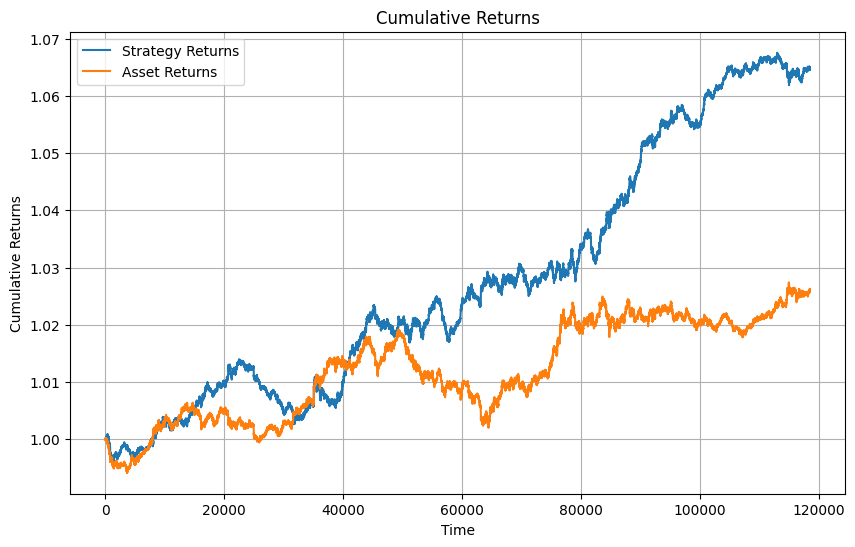

----------------------------------------------------------------
Strategy info by model lightgbm
Cumulative Return: 6.49%
Sharpe Ratio: 24.67
Max Drawdown: 1.11%
Win Ratio: 49.71%
Annual Return: 289.39%
Annual Volatility: 11.73%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [30]:
backtest.plot_cumulative_returns(desc=model_name)
backtest.calculate_metrics()
backtest.print_metrics(desc=model_name)

## `get_signals_dl` Function:

The `get_signals_dl` function is responsible for obtaining trading signals using a deep learning model. Here's a breakdown of its functionality:

1. **Data Preparation:**
   - It prepares the training dataset by converting it into PyTorch DataLoader format using the `get_DL_data` function.
   - It prepares the testing dataset by concatenating the training and testing data, converting it into PyTorch tensors, and creating a DataLoader object for testing data.

2. **Model Loading:**
   - It loads the pre-trained deep learning model from the specified model file path.
   - The model is initialized and moved to the appropriate device (GPU if available).

3. **Evaluation on Test Data:**
   - It evaluates the loaded model on the testing dataset by iterating over batches using DataLoader.
   - It generates probabilities for each class (or regression output) using the model's softmax function for classification or sigmoid function for regression.

4. **Evaluation on Training Data:**
   - It evaluates the loaded model on the training dataset using the same procedure as for the testing dataset.

5. **Score Calculation:**
   - It calculates scores by multiplying the predicted probabilities with a score matrix.

6. **Threshold Calculation:**
   - It calculates thresholds for long and short positions based on percentiles of scores obtained from the training data.

7. **Signal Generation:**
   - It generates trading signals based on the calculated thresholds.
   - Signals greater than or equal to the long threshold are assigned a value of 1 (indicating a long position).
   - Signals less than or equal to the short threshold are assigned a value of -1 (indicating a short position).
   - Other signals are assigned a value of 0 (indicating no action).

8. **Return:**
   - The function returns the generated signals.


In [36]:
def get_signals_dl(train_X: pd.DataFrame, train_y: pd.Series, test_X: pd.DataFrame, test_y: pd.Series, model_name: str, loss_name: str, method='classification'):

    print("Preparing training data set ...")
    num_feature, train_dataloader, _ = get_DL_data(train_X, train_y)

    print("Preparing testing data set ...")
    X, y = pd.concat([train_X, test_X]), pd.concat([train_y, test_y])
    X, y = torch.from_numpy(X.values), torch.from_numpy(y.values)
    X = X.unfold(0, SEQ_LEN, 1).permute(0, 2, 1)
    X_test, y_test = X[-test_X.shape[0]:], y[-test_y.shape[0]:]

    test_dataset = Data(X_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    model, _ = initialize_model(model_name, loss_name, num_feature, method=method)
    model.to(device)

    model_file_path = f"Model/{model_name}.pt"
    print(f"Loading existing model from {model_file_path}")
    model.load_state_dict(torch.load(model_file_path))
    # model.load_state_dict(torch.load(model_file_path), strict=False)

    # Evaluate on test data
    print("Evaluating on testing data set ...")
    model.eval()
    all_probs = []
    with torch.no_grad():
        for x_test, y_test in test_dataloader:
            x_test, y_test = x_test.float(), y_test.float()
            x_test, y_test = x_test.to(device), y_test.to(device)
            logits = model(x_test)

            if method == 'classification':
                probs = torch.softmax(logits, dim=1)
            elif method == 'regression':
                probs = torch.sigmoid(logits)  # Use sigmoid for binary regression

            all_probs.extend(probs.cpu().numpy())

    print("Evaluating on training data set ...")
    train_probs = []
    with torch.no_grad():
        for x_train, y_train in train_dataloader:
            x_train, y_train = x_train.float(), y_train.float()
            x_train, y_train = x_train.to(device), y_train.to(device)
            logits = model(x_train)

            if method == 'classification':
                probs = torch.softmax(logits, dim=1)
            elif method == 'regression':
                probs = torch.sigmoid(logits)  # Use sigmoid for binary regression

            train_probs.extend(probs.cpu().numpy())

    print("Calculating scores ...")
    score_mat = np.array([0, 1, 2])
    scores = all_probs @ score_mat
    
    train_scores = train_probs @ score_mat
    long_thres = np.percentile(train_scores, 99)
    short_thres = np.percentile(train_scores, 1)

    signals = np.zeros(test_X.shape[0])
    signals[scores >= long_thres] = 1
    signals[scores <= short_thres] = -1

    return signals

In [37]:
# model_name = 'ALSTM'
# model_name = 'LSTM'
# model_name = 'TCN'
# model_name = 'GATS'
# model_name = 'SFM'
# model_name = 'GRU'
model_name = 'Transformer'

signals = get_signals_dl(train_X, train_y, test_X, test_y, model_name, 'CrossEntropy', 'classification')

Preparing training data set ...
Preparing testing data set ...
Loading existing model from Model/Transformer.pt
Evaluating on testing data set ...
Evaluating on training data set ...
Calculating scores ...


In [38]:
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 1100
The number of predicted label 0: 116180
The number of predicted label -1: 1196


In [39]:
backtest = Backtest(initial_capital=1e6, commission_rate=0, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 417366.40it/s]


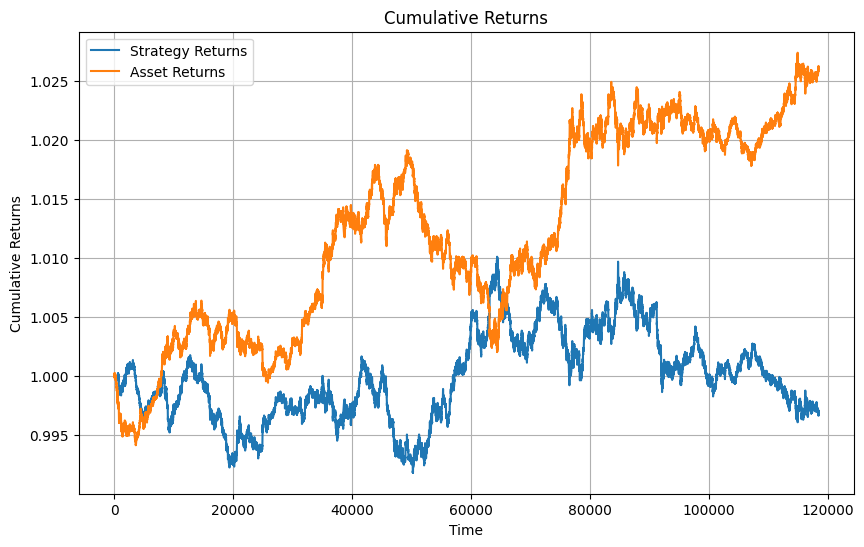

----------------------------------------------------------------
Strategy info by model Transformer
Cumulative Return: -0.31%
Sharpe Ratio: -1.16
Max Drawdown: 1.39%
Win Ratio: 50.00%
Annual Return: -13.70%
Annual Volatility: 11.86%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [40]:
backtest.plot_cumulative_returns(desc=model_name)
backtest.calculate_metrics()
backtest.print_metrics(desc=model_name)

## Other strategy

## `AsyncPriceSpreadStrategy` Class:

The `AsyncPriceSpreadStrategy` class implements an asynchronous price spread manipulation strategy for trading. Here's a breakdown of its functionality:

1. **Initialization:**
   - The class is initialized with parameters such as the price and volume data, jump threshold, spread threshold, and stop-loss threshold.

2. **Signal Calculation:**
   - The `calculate_signals` method is responsible for computing trading signals based on the asynchronous price spread strategy.
   - It iterates over the data rows, tracking the position and executed prices.
   - If there's no open position, it checks for price jumps exceeding the jump threshold to execute either a long or short position.
   - If a long position is open, it calculates the virtual spread and checks for conditions to close the position based on thresholds.
   - If a short position is open, it similarly calculates the virtual spread and checks for conditions to close the position.
   - The method updates the asynchronous spread, virtual spread, and signals in the DataFrame accordingly.

3. **Return:**
   - The method returns the DataFrame containing the calculated signals and asynchronous price spreads.

4. **Additional Notes:**
   - The class utilizes the `tqdm` library for progress tracking during signal calculation.
   - It employs Pandas for data manipulation and storage of trading signals and spreads.


In [29]:
import pandas as pd
from tqdm import tqdm

class AsyncPriceSpreadStrategy:
    def __init__(self, data, jump_threshold=0.8, spread_threshold=5.0, stop_loss=2.0):
        """
        Initialize the AsyncPriceSpreadStrategy class.

        :param data: DataFrame containing the price and volume data
        :param jump_threshold: Threshold for price jumps to trigger trade execution (default: 0.8)
        :param spread_threshold: Threshold for the asynchronous price spread to trigger trade execution (default: 5.0)
        :param stop_loss: Stop-loss threshold for the asynchronous price spread (default: 2.0)
        """
        self.data = data
        self.jump_threshold = jump_threshold
        self.spread_threshold = spread_threshold
        self.stop_loss = stop_loss

    def calculate_signals(self):
        """
        Calculate the trading signals based on the asynchronous price spread manipulation strategy.

        :return: DataFrame with the calculated signals and asynchronous price spreads
        """
        # Calculate price jumps for the front-month and next-month contracts
        self.data['jump_front'] = self.data['mid'].diff()
        # self.data['jump_front'] = self.data['mid'].shift(-1) - self.data['mid']

        # Initialize columns for virtual and actual asynchronous price spreads and signals
        self.data['async_spread_virtual'] = 0.0
        self.data['async_spread'] = 0.0
        self.data['signal'] = 0

        # Initialize variables for position tracking and executed prices
        position = 0
        front_executed_price = 0.0
        next_executed_price = 0.0

        # Iterate over the data rows using tqdm for progress tracking
        for i in tqdm(range(len(self.data)), desc="Calculating signals"):
            if position == 0:
                # No open position
                if self.data['jump_front'][i] >= self.jump_threshold:
                    # Front-month contract price jump exceeds the threshold, execute long position
                    front_executed_price = self.data['ask1'][i]
                    position = -1
                elif self.data['jump_front'][i] <= -self.jump_threshold:
                    # Next-month contract price jump is below the negative threshold, execute short position
                    next_executed_price = self.data['bid1'][i]
                    position = 1

            elif position == 1:
                # Long position open
                self.data.loc[i, 'async_spread_virtual'] = front_executed_price - self.data['bid1'][i]
                if self.data['jump_front'][i] <= -self.jump_threshold or self.data['async_spread_virtual'][i] >= self.spread_threshold:
                    # Next-month contract price jump is below the negative threshold or virtual spread exceeds the threshold
                    next_executed_price = self.data['bid1'][i]
                    self.data.loc[i, 'async_spread'] = front_executed_price - next_executed_price
                    self.data.loc[i, 'signal'] = 1
                    position = 0
                elif self.data['async_spread_virtual'][i] <= -self.stop_loss:
                    # Virtual spread exceeds the negative stop-loss threshold, close position
                    next_executed_price = self.data['bid1'][i]
                    self.data.loc[i, 'async_spread'] = front_executed_price - next_executed_price
                    self.data.loc[i, 'signal'] = 1
                    position = 0

            elif position == -1:
                # Short position open
                self.data.loc[i, 'async_spread_virtual'] = self.data['ask1'][i] - next_executed_price
                if self.data['jump_front'][i] >= self.jump_threshold or self.data['async_spread_virtual'][i] >= self.spread_threshold:
                    # Front-month contract price jump exceeds the threshold or virtual spread exceeds the threshold
                    front_executed_price = self.data['ask1'][i]
                    self.data.loc[i, 'async_spread'] = front_executed_price - next_executed_price
                    self.data.loc[i, 'signal'] = -1
                    position = 0
                elif self.data['async_spread_virtual'][i] <= -self.stop_loss:
                    # Virtual spread exceeds the negative stop-loss threshold, close position
                    front_executed_price = self.data['ask1'][i]
                    self.data.loc[i, 'async_spread'] = front_executed_price - next_executed_price
                    self.data.loc[i, 'signal'] = -1
                    position = 0

        return self.data

In [38]:
APS = AsyncPriceSpreadStrategy(test.reset_index(drop=True), jump_threshold=0.5, spread_threshold=3, stop_loss=2)
aps_signals = APS.calculate_signals()

Calculating signals: 100%|██████████| 118476/118476 [00:07<00:00, 16719.54it/s]


In [39]:
signals = aps_signals['signal'].values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 1109
The number of predicted label 0: 116272
The number of predicted label -1: 1095


In [40]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress:   0%|          | 0/118476 [00:00<?, ?it/s]

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 411280.54it/s]


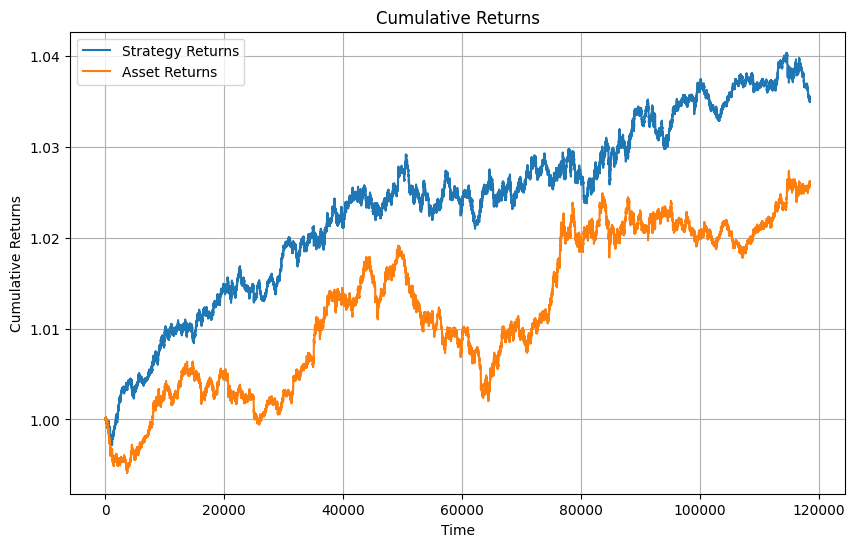

----------------------------------------------------------------
Strategy info by model Async Price Spread Strategy
Cumulative Return: 3.52%
Sharpe Ratio: 13.45
Max Drawdown: 0.80%
Win Ratio: 50.05%
Annual Return: 159.45%
Annual Volatility: 11.86%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [41]:
desc = 'Async Price Spread Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `GFTDStrategy` Class:

The `GFTDStrategy` class implements the Guppy Multiple Moving Averages (GMMA) Guppy Flip Trading System (GFTD) strategy for generating trading signals. Here's a breakdown of its functionality:

1. **Initialization:**
   - The class is initialized with a DataFrame containing price data and parameters `n1`, `n2`, and `n3`.
   - `n1`: Parameter for the number of lagged periods in price comparison.
   - `n2`: Parameter for the number of consecutive periods required for setup formation.
   - `n3`: Parameter for the number of periods required for countdown completion.

2. **Signal Generation:**
   - The `generate_signals` method iterates over each data point in the DataFrame to generate trading signals.
   - It checks for buy and sell setups based on price comparisons over specified periods.
   - If a buy setup is found, it initiates the buy countdown.
   - If a sell setup is found, it initiates the sell countdown.
   - The method stores the last generated signal.

3. **Buy Setup and Countdown:**
   - The `check_buy_setup` method checks if the mid price is lower than the mid price `n1` periods ago for `n2` consecutive periods.
   - The `buy_countdown` method starts the buy countdown for `n3` periods.
   - It checks specific conditions related to mid price and ask5 price over the countdown period.
   - If the conditions are met, a buy signal (-1) is generated.

4. **Sell Setup and Countdown:**
   - The `check_sell_setup` method checks if the mid price is higher than the mid price `n1` periods ago for `n2` consecutive periods.
   - The `sell_countdown` method starts the sell countdown for `n3` periods.
   - It checks specific conditions related to mid price and bid5 price over the countdown period.
   - If the conditions are met, a sell signal (1) is generated.

5. **Signal Storage and Handling:**
   - The method stores the generated signals in a pandas Series.
   - It handles missing signals by filling forward with the previous signal and then filling any remaining missing signals with 0.

In [42]:
import pandas as pd
import numpy as np
from tqdm import tqdm

class GFTDStrategy:
    def __init__(self, df, n1=5, n2=3, n3=6):
        self.df = df
        self.n1 = n1  # Parameter for the number of lagged periods in price comparison
        self.n2 = n2  # Parameter for the number of consecutive periods required for setup formation
        self.n3 = n3  # Parameter for the number of periods required for countdown completion
        self.signals = pd.Series(index=df.index)
        self.last_signal = 0

    def generate_signals(self):
        # Iterate through each data point in the DataFrame
        for i in tqdm(range(len(self.df)-self.n3), desc="Generating signals"):
            if i < self.n1:
                continue

            # Check for buy and sell setups
            buy_setup = self.check_buy_setup(i)
            sell_setup = self.check_sell_setup(i)

            # If a buy setup is found, start the buy countdown
            if buy_setup:
                self.last_signal = self.buy_countdown(i)
            # If a sell setup is found, start the sell countdown
            elif sell_setup:
                self.last_signal = self.sell_countdown(i)

            # Store the last generated signal
            self.signals[i+self.n3] = self.last_signal

        # Fill any missing signals with the previous signal
        self.signals.fillna(method='ffill', inplace=True)
        # Fill any remaining missing signals with 0
        self.signals.fillna(0, inplace=True)

    def check_buy_setup(self, i):
        setup = True
        # Check if the mid price is lower than the mid price n1 periods ago for n2 consecutive periods
        for j in range(self.n2):
            if self.df.iloc[i-j]['mid'] >= self.df.iloc[i-j-self.n1]['mid']:
                setup = False
                break
        return setup

    def check_sell_setup(self, i):
        setup = True
        # Check if the mid price is higher than the mid price n1 periods ago for n2 consecutive periods
        for j in range(self.n2):
            if self.df.iloc[i-j]['mid'] <= self.df.iloc[i-j-self.n1]['mid']:
                setup = False
                break
        return setup

    def buy_countdown(self, i):
        countdown = 0
        # Start the buy countdown for n3 periods
        for j in range(i, i+self.n3):
            if j >= len(self.df):
                break
            # Check if the mid price is greater than or equal to the ask5 price 2 periods ago,
            # greater than the ask5 price 1 period ago, and greater than the mid price at the start of the countdown
            if (self.df.iloc[j]['mid'] >= self.df.iloc[j-2]['ask5']) or \
               (self.df.iloc[j]['ask5'] > self.df.iloc[j-1]['ask5']) or \
               (self.df.iloc[j]['mid'] > self.df.iloc[j-countdown]['mid']):
                countdown += 1
                # If the countdown reaches n3, generate a buy signal (1)
                if countdown == self.n3:
                    return -1
            else:
                return 0
        return 0

    def sell_countdown(self, i):
        countdown = 0
        # Start the sell countdown for n3 periods
        for j in range(i, i+self.n3):
            if j >= len(self.df):
                break
            # Check if the mid price is less than or equal to the bid5 price 2 periods ago,
            # less than the bid5 price 1 period ago, and less than the mid price at the start of the countdown
            if (self.df.iloc[j]['mid'] <= self.df.iloc[j-2]['bid5']) or \
               (self.df.iloc[j]['bid5'] < self.df.iloc[j-1]['bid5']) or \
               (self.df.iloc[j]['mid'] < self.df.iloc[j-countdown]['mid']):
                countdown += 1
                # If the countdown reaches n3, generate a sell signal (-1)
                if countdown == self.n3:
                    return 1
            else:
                return 0
        return 0

In [59]:
# Assuming your data is in a DataFrame called 'df'
# gftd = GFTDStrategy(df.iloc[:50000], n1=5, n2=10, n3=20)
gftd = GFTDStrategy(test.reset_index(drop=True), n1=5, n2=3, n3=6)
gftd.generate_signals()
signals_gftd = gftd.signals

Generating signals: 100%|██████████| 118470/118470 [00:30<00:00, 3912.12it/s]


In [60]:
signals = -signals_gftd.values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 1615
The number of predicted label 0: 115127
The number of predicted label -1: 1734


In [61]:
# backtest = Backtest(initial_capital=1e6, commission_rate=0, price_=test_price[:50000], return_=test_return[:50000], signal_=signals)
backtest = Backtest(initial_capital=1e6, commission_rate=0, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 405034.57it/s]


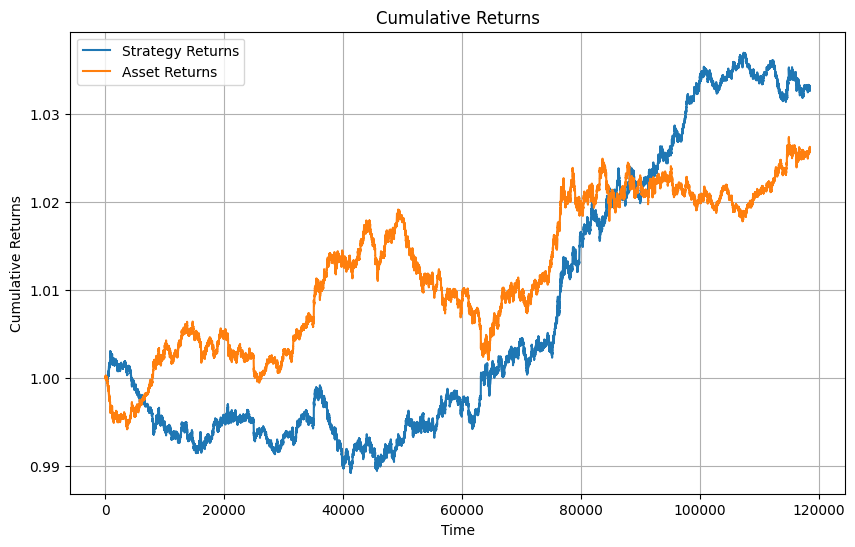

----------------------------------------------------------------
Strategy info by model GFTD Strategy
Cumulative Return: 3.29%
Sharpe Ratio: 12.58
Max Drawdown: 1.38%
Win Ratio: 50.03%
Annual Return: 149.37%
Annual Volatility: 11.87%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [62]:
desc = 'GFTD Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `IntradayExtremeValueStrategy` Class:

The `IntradayExtremeValueStrategy` class implements a strategy based on intraday extreme high and low values to generate long and short trading signals. Here's a breakdown of its functionality:

1. **Initialization:**
   - The class is initialized with a DataFrame containing high-frequency future price and volume data, along with parameters `cut_off` and `offset`.
   - `cut_off`: Cut-off threshold for signal calculation.
   - `offset`: Offset parameter for calculating intraday extreme values.

2. **Calculate Intraday Extreme Values:**
   - The `calculate_extreme_values` method calculates the intraday extreme high and low values using rolling windows.
   - It computes the highest ask5 price and lowest bid5 price within the specified offset.

3. **Generate Signals:**
   - The `generate_signals` method generates long and short signals based on the intraday extreme values.
   - It iterates over each data point in the DataFrame and compares the mid price with the intraday extreme high and low values.
   - If the mid price exceeds the intraday high, a long signal (1) is generated.
   - If the mid price falls below the intraday low, a short signal (-1) is generated.
   - Otherwise, no signal (0) is generated.

4. **Run Strategy:**
   - The `run` method executes the intraday extreme value trend-following strategy.
   - It first calculates intraday extreme values.
   - Then, it generates trading signals based on these extreme values.
   - Finally, it prints a completion message and returns the DataFrame with signals appended.

5. **Signal Storage and Handling:**
   - The generated signals are stored in a new column named `'signal'` in the DataFrame.
   - The signals are represented as 1 for long, -1 for short, and 0 for no action.

In [63]:
import pandas as pd
from tqdm import tqdm

class IntradayExtremeValueStrategy:
    def __init__(self, data, cut_off=15, offset=2):
        """
        Initialize the strategy.

        :param data: DataFrame containing the high frequency future price and volume data
        :param cut_off: Cut-off threshold for signal calculation
        :param offset: Offset parameter for calculating intraday extreme values
        """
        self.data = data
        self.cut_off = cut_off
        self.offset = offset

    def calculate_extreme_values(self):
        """
        Calculate the intraday extreme high and low values.
        """
        self.data['intraday_high'] = self.data['ask5'].rolling(window=self.offset).max()
        self.data['intraday_low'] = self.data['bid5'].rolling(window=self.offset).min()

    def generate_signals(self):
        """
        Generate long and short signals based on the intraday extreme values.
        """
        signals = []
        for i in tqdm(range(len(self.data))):
            if i < self.cut_off:
                signals.append(0)
            else:
                if self.data['mid'][i] > self.data['intraday_high'][i - self.cut_off]:
                    signals.append(1)  # Long signal
                elif self.data['mid'][i] < self.data['intraday_low'][i - self.cut_off]:
                    signals.append(-1)  # Short signal
                else:
                    signals.append(0)  # No signal

        self.data['signal'] = signals

    def run(self):
        """
        Run the intraday extreme value trend following strategy.
        """
        print("Calculating intraday extreme values...")
        self.calculate_extreme_values()
        print("Generating signals...")
        self.generate_signals()
        print("Strategy execution completed.")
        
        return self.data

In [81]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = IntradayExtremeValueStrategy(data=test.reset_index(drop=True), cut_off=30, offset=10)
# strategy = IntradayExtremeValueStrategy(data=df.iloc[:50000], cut_off=15, offset=5)
signal_iev = strategy.run()

Calculating intraday extreme values...
Generating signals...


100%|██████████| 118476/118476 [00:00<00:00, 119378.99it/s]

Strategy execution completed.


In [82]:
signals = signal_iev['signal'].values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 10406
The number of predicted label 0: 98957
The number of predicted label -1: 9113


In [93]:
# backtest = Backtest(initial_capital=1e6, commission_rate=0, price_=test_price[:50000], return_=test_return[:50000], signal_=signals)
backtest = Backtest(initial_capital=1e6, commission_rate=1e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 422935.23it/s]


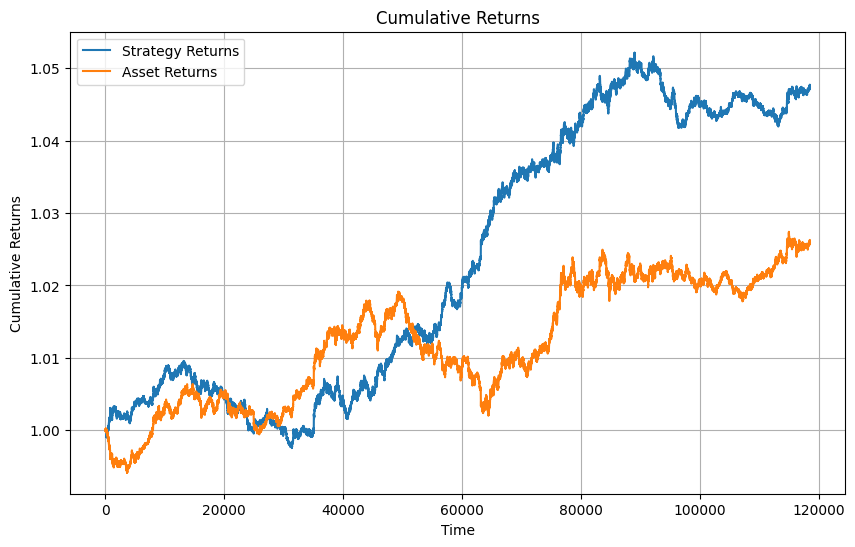

----------------------------------------------------------------
Strategy info by model Intraday Extreme Value Strategy
Cumulative Return: 4.75%
Sharpe Ratio: 17.99
Max Drawdown: 1.19%
Win Ratio: 50.67%
Annual Return: 213.77%
Annual Volatility: 11.88%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [94]:
desc = 'Intraday Extreme Value Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `LPTTStrategy` Class:

The `LPTTStrategy` class implements the Low-order Price Trend and Time Trend strategy (LPTT) for generating long and short trading signals. Here's a breakdown of its functionality:

1. **Initialization:**
   - The class is initialized with a DataFrame containing price data and several parameters:
     - `window_size`: Size of the window for analyzing price trends.
     - `entry_time`: Time within the window to consider for entering a trade.
     - `stop_loss`: Stop-loss threshold for exiting a position.
     - `take_profit`: Take-profit threshold for exiting a position.

2. **Polyfit Function:**
   - The `polyfit` method fits linear or quadratic polynomials to the price data within a given window.

3. **Run Strategy:**
   - The `run` method executes the LPTT strategy.
   - It iterates over each data point in the DataFrame.
   - At each iteration, it extracts a window of data and fits linear and quadratic polynomials to the mid price.
   - If the current time corresponds to the entry time within the window:
     - It checks for entry conditions based on the slopes of the linear and quadratic fits.
     - If conditions are met, it generates a long or short signal.
   - If a position is open:
     - It checks for exit conditions based on stop-loss and take-profit thresholds.
     - If exit conditions are met, it closes the position.
   - The generated signals are stored in the `signals` attribute.

4. **Signal Representation:**
   - Long signals are represented as 1, short signals as -1, and no action as 0.

5. **Completion Message:**
   - Upon completion of the strategy, it prints a message indicating the end of the strategy execution.


In [182]:
import numpy as np
from tqdm import tqdm

class LPTTStrategy:
    def __init__(self, data, window_size=85, entry_time=5, stop_loss=0.0005, take_profit=0.001):
        self.data = data
        self.window_size = window_size
        self.entry_time = entry_time
        self.stop_loss = stop_loss
        self.take_profit = take_profit
        self.signals = np.zeros(len(data))

    def polyfit(self, x, y, degree):
        coeffs = np.polyfit(x, y, degree)
        return np.poly1d(coeffs)

    def run(self):
        print("Running LPTT Strategy...")

        ask5 = self.data['ask5'].values
        bid5 = self.data['bid5'].values
        mid = self.data['mid'].values

        for i in tqdm(range(self.window_size, len(self.data))):
            window_data = self.data.iloc[i - self.window_size : i]
            
            # Extract relevant price and time data from the window
            time_index = np.arange(len(window_data))

            # Fit linear and quadratic polynomials to the price data
            linear_fit = self.polyfit(time_index, window_data['mid'].values, 1)
            quadratic_fit = self.polyfit(time_index, window_data['mid'].values, 2)

            # Check if the current time is within the entry window
            if i % self.window_size == self.entry_time:
                # Check for entry conditions
                if linear_fit[1] > 0 and quadratic_fit[2] > 0:
                    self.signals[i] = 1  # Long signal
                elif linear_fit[1] < 0 and quadratic_fit[2] < 0:
                    self.signals[i] = -1  # Short signal

            # Check for exit conditions
            if self.signals[i - 1] != 0:
                if self.signals[i - 1] == 1:
                    if ask5[i] >= mid[i - 1] * (1 + self.take_profit) or bid5[i] <= mid[i - 1] * (1 - self.stop_loss):
                        self.signals[i] = 0  # Exit long position
                elif self.signals[i - 1] == -1:
                    if bid5[i] <= mid[i - 1] * (1 - self.take_profit) or ask5[i] >= mid[i - 1] * (1 + self.stop_loss):
                        self.signals[i] = 0  # Exit short position
        
        print("LPTT Strategy completed.")
        return self.signals

In [196]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = LPTTStrategy(data=test.reset_index(drop=True), window_size=20, entry_time=0, stop_loss=5e-3, take_profit=1e-2)
signal_lptt = strategy.run()

Running LPTT Strategy...


100%|██████████| 118456/118456 [00:10<00:00, 11485.30it/s]

LPTT Strategy completed.


In [197]:
signals = signal_lptt
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 1509
The number of predicted label 0: 115487
The number of predicted label -1: 1480


In [204]:
backtest = Backtest(initial_capital=1e6, commission_rate=3e-6, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 398025.08it/s]


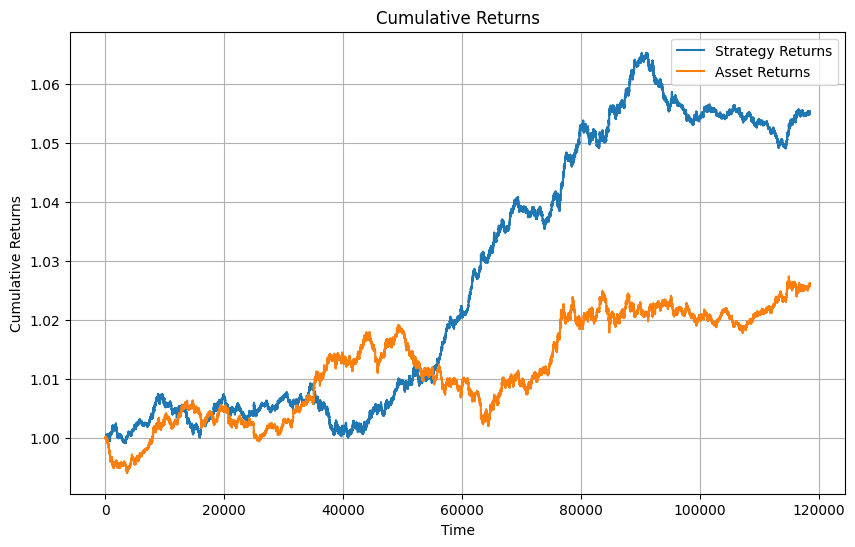

----------------------------------------------------------------
Strategy info by model Low-order Polynomial Trend Strategy
Cumulative Return: 5.51%
Sharpe Ratio: 20.81
Max Drawdown: 1.52%
Win Ratio: 50.63%
Annual Return: 247.14%
Annual Volatility: 11.88%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [205]:
desc = 'Low-order Polynomial Trend Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `RSIStrategy` Class:

The `RSIStrategy` class implements a trading strategy based on the Relative Strength Index (RSI) indicator. Here's an overview of its functionality:

1. **Initialization:**
   - Upon initialization, the class requires a DataFrame containing high-frequency future price and volume data, along with several parameters:
     - `window`: Rolling window size for calculating RSI.
     - `upper_threshold`: Upper threshold for RSI to enter a long position.
     - `lower_threshold`: Lower threshold for RSI to enter a short position.
     - `long_exit`: RSI level to exit a long position.
     - `short_exit`: RSI level to exit a short position.
   - The `signals` attribute is initialized to `None`.

2. **Calculate RSI:**
   - The `calculate_rsi` method computes the RSI indicator using the `mid` price as the close price.
   - It calculates price changes, gains, losses, average gains, average losses, relative strength, and finally RSI.

3. **Generate Signals:**
   - The `generate_signals` method generates long and short signals based on the RSI indicator.
   - It iterates over each data point in the RSI series.
   - If the previous signal was no position:
     - It checks if RSI crosses the upper or lower threshold to generate a long or short signal, respectively.
   - If the previous signal was a long position:
     - It checks if RSI crosses the `long_exit` threshold to exit the long position.
   - If the previous signal was a short position:
     - It checks if RSI crosses the `short_exit` threshold to exit the short position.
   - The generated signals are stored in the `signals` attribute.

4. **Signal Representation:**
   - Long signals are represented as 1, short signals as -1, and no action as 0.

5. **Progress Bar:**
   - During signal generation, a tqdm progress bar tracks the process.

6. **Completion Message:**
   - Upon completion of signal generation, the method returns the generated signals and prints a completion message.

In [215]:
import pandas as pd
import numpy as np
from tqdm import tqdm

class RSIStrategy:
    def __init__(self, data, window=30, upper_threshold=70, lower_threshold=30, long_exit=50, short_exit=50):
        """
        Initialize the RSIStrategy class.

        :param data: DataFrame containing the high-frequency future price and volume data
        :param window: Rolling window size for calculating RSI (default: 30)
        :param upper_threshold: Upper threshold for RSI to enter a long position (default: 70)
        :param lower_threshold: Lower threshold for RSI to enter a short position (default: 30)
        :param long_exit: RSI level to exit a long position (default: 50)
        :param short_exit: RSI level to exit a short position (default: 50)
        """
        self.data = data
        self.window = window
        self.upper_threshold = upper_threshold
        self.lower_threshold = lower_threshold
        self.long_exit = long_exit
        self.short_exit = short_exit
        self.signals = None

    def calculate_rsi(self):
        """
        Calculate the RSI indicator.
        """
        # Use 'mid' price as close price for RSI calculation
        close_price = self.data['mid']
        
        # Calculate price changes
        price_change = close_price.diff()
        
        # Calculate gains and losses
        gain = price_change.where(price_change > 0, 0)
        loss = -price_change.where(price_change < 0, 0)
        
        # Calculate average gains and losses
        avg_gain = gain.rolling(window=self.window).mean()
        avg_loss = loss.rolling(window=self.window).mean()
        
        # Calculate relative strength
        rs = avg_gain / avg_loss
        
        # Calculate RSI
        rsi = 100 - (100 / (1 + rs))
        
        return rsi

    def generate_signals(self):
        """
        Generate long and short signals based on the RSI indicator.
        """
        rsi = self.calculate_rsi()
        
        # Initialize signals to 0
        signals = pd.Series(0, index=rsi.index)
        
        # Generate long and short signals
        for i in tqdm(range(1, len(signals)), desc="Generating Signals"):
            if signals[i-1] == 0:
                if rsi[i-1] > self.upper_threshold:
                    signals[i] = 1  # Enter short position
                elif rsi[i-1] < self.lower_threshold:
                    signals[i] = -1  # Enter long position
            elif signals[i-1] == 1:
                if rsi[i-1] > self.long_exit:
                    signals[i] = 0  # Exit long position
            elif signals[i-1] == -1:
                if rsi[i-1] < self.short_exit:
                    signals[i] = 0  # Exit short position
            else:
                signals[i] = signals[i-1]  # Maintain previous position
        
        self.signals = signals
        
        return signals

In [216]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = RSIStrategy(data=test.reset_index(drop=True), window=30, upper_threshold=70, lower_threshold=30, long_exit=50, short_exit=50)
signal_rsi = strategy.generate_signals()

Generating Signals: 100%|██████████| 118475/118475 [00:00<00:00, 281993.80it/s]


In [217]:
signals = signal_rsi.values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 4392
The number of predicted label 0: 109778
The number of predicted label -1: 4306


In [220]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-6, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 410273.05it/s]


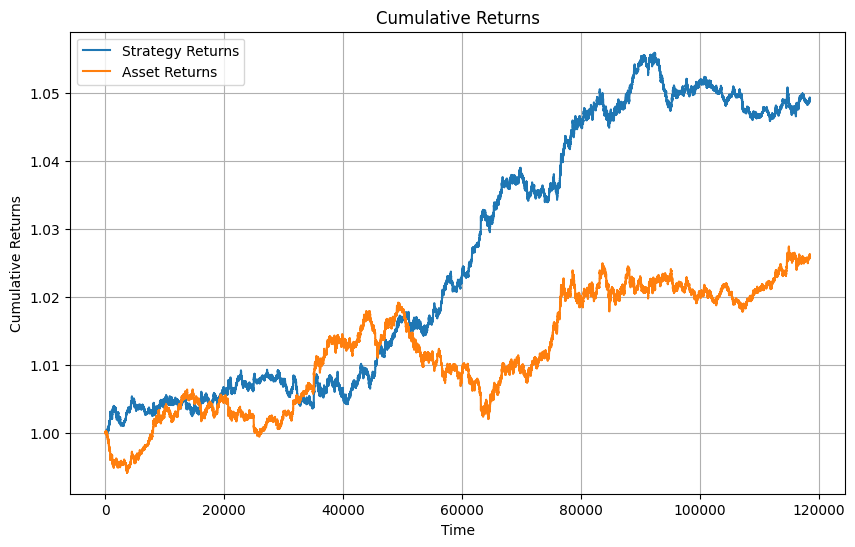

----------------------------------------------------------------
Strategy info by model RSI-based High Freq Strategy
Cumulative Return: 4.91%
Sharpe Ratio: 18.59
Max Drawdown: 0.95%
Win Ratio: 50.57%
Annual Return: 220.72%
Annual Volatility: 11.87%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [221]:
desc = 'RSI-based High Freq Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `BidAskAnomalyStrategy` Class:

The `BidAskAnomalyStrategy` class implements a trading strategy based on bid-ask volume imbalances. Here's an overview of its functionality:

1. **Initialization:**
   - Upon initialization, the class requires a DataFrame containing futures price and volume data, along with two parameters:
     - `window`: Window size for calculating moving averages and standard deviations.
     - `std_multiplier`: Multiplier for standard deviation in signal generation.

2. **Calculate H:**
   - The `calculate_H` method computes the value of H, which represents the ratio of total ask volume to total bid volume.
   - It sums up the ask and bid volumes for each row and computes the ratio.

3. **Calculate Moving Average:**
   - The `calculate_moving_average` method calculates the moving average of H over the specified window size.

4. **Calculate Standard Deviation:**
   - The `calculate_std` method computes the standard deviation of H over the specified window size.

5. **Generate Signals:**
   - The `generate_signals` method generates trading signals based on deviations of H from its moving average.
   - It iterates over each data point in the DataFrame.
   - If H is above the moving average plus `std_multiplier` times the standard deviation, it generates a long signal.
   - If H is below the moving average minus `std_multiplier` times the standard deviation, it generates a short signal.
   - Otherwise, it generates no signal.
   - The generated signals are stored in a new column named `'Signal'`.

6. **Progress Bar:**
   - During signal generation, a tqdm progress bar tracks the process.

7. **Completion Message:**
   - Upon completion of signal generation, the method returns the DataFrame with the generated signals.

In [26]:
import pandas as pd
from tqdm import tqdm

class BidAskAnomalyStrategy:
    def __init__(self, data, window, std_multiplier):
        """
        Initialize the BidAskAnomalyStrategy class.

        :param data: DataFrame containing the futures price and volume data
        :param window: Window size for moving average calculation
        :param std_multiplier: Multiplier for standard deviation in signal generation
        """
        self.data = data
        self.window = window
        self.std_multiplier = std_multiplier

    def calculate_H(self):
        """
        Calculate the H value based on the sum of bid and ask volumes.
        """
        self.data['total_ask_vol'] = self.data[['ask1vol', 'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol']].sum(axis=1)
        self.data['total_bid_vol'] = self.data[['bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol']].sum(axis=1)
        self.data['H'] = self.data['total_ask_vol'] / self.data['total_bid_vol']

    def calculate_moving_average(self):
        """
        Calculate the moving average of H.
        """
        self.data['H_ma'] = self.data['H'].rolling(window=self.window).mean()

    def calculate_std(self):
        """
        Calculate the standard deviation of H.
        """
        self.data['H_std'] = self.data['H'].rolling(window=self.window).std()

    def generate_signals(self):
        """
        Generate trading signals based on the H value and its moving average.
        """
        signals = []
        for i in tqdm(range(len(self.data)), desc="Generating Signals"):
            if i < self.window:
                signals.append(0)
            else:
                if self.data['H'][i] > self.data['H_ma'][i] + self.std_multiplier * self.data['H_std'][i]:
                    signals.append(-1)  # Long signal
                elif self.data['H'][i] < self.data['H_ma'][i] - self.std_multiplier * self.data['H_std'][i]:
                    signals.append(1)  # Short signal
                else:
                    signals.append(0)  # No signal
        self.data['Signal'] = signals

    def run(self):
        """
        Run the trading strategy.
        """
        self.calculate_H()
        self.calculate_moving_average()
        self.calculate_std()
        # print(self.data['H'])
        # print(self.data['H_ma'])
        # print(self.data['H_std'])
        self.generate_signals()
        return self.data

In [37]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = BidAskAnomalyStrategy(data=test.reset_index(drop=True), window=60, std_multiplier=1.5)
signal_bas = strategy.run()

Generating Signals: 100%|██████████| 118476/118476 [00:01<00:00, 81417.19it/s]


In [38]:
signals = signal_bas['Signal'].values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 4347
The number of predicted label 0: 100000
The number of predicted label -1: 14129


In [39]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 384641.68it/s]


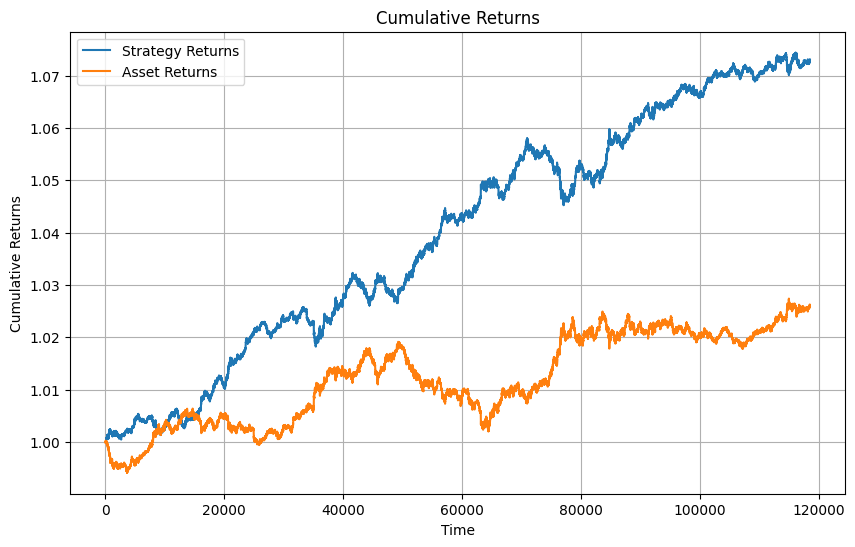

----------------------------------------------------------------
Strategy info by model Bid Ask Volume Anomaly Strategy
Cumulative Return: 7.30%
Sharpe Ratio: 27.37
Max Drawdown: 1.21%
Win Ratio: 50.55%
Annual Return: 324.28%
Annual Volatility: 11.85%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [40]:
desc = 'Bid Ask Volume Anomaly Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `DualThrustStrategy` Class:

The `DualThrustStrategy` class implements a trading strategy known as Dual Thrust. Here's an overview of its functionality:

1. **Initialization:**
   - Upon initialization, the class requires a DataFrame containing high-frequency futures price and volume data, along with three parameters:
     - `lookback`: Number of periods to look back for calculating the range.
     - `k1`: Multiplier for the buy signal threshold.
     - `k2`: Multiplier for the sell signal threshold.

2. **Calculate Range:**
   - The `calculate_range` method computes the range based on the high and low prices.
   - It calculates the difference between the rolling maximum of high prices and the rolling minimum of low prices over the specified lookback period.

3. **Generate Signals:**
   - The `generate_signals` method generates buy and sell signals based on the Dual Thrust strategy.
   - It initializes columns `'buy_signal'` and `'sell_signal'` in the DataFrame to store the generated signals.
   - It iterates over each data point in the DataFrame starting from the lookback period.
   - If the mid price exceeds the previous mid price plus `k1` times the range, it generates a buy signal.
   - If the mid price falls below the previous mid price minus `k2` times the range, it generates a sell signal.
   - The final signal is the sum of buy and sell signals, stored in a column named `'signal'`.

4. **Run Method:**
   - The `run` method executes the Dual Thrust strategy by calling `calculate_range` and `generate_signals`.
   - It returns the DataFrame with the calculated range and generated signals.

5. **Progress Bar:**
   - During signal generation, a tqdm progress bar tracks the process.


In [84]:
import pandas as pd
from tqdm import tqdm

class DualThrustStrategy:
    def __init__(self, data, lookback=20, k1=0.5, k2=0.5):
        """
        Initialize the DualThrust class.
        
        :param data: DataFrame containing the high-frequency futures price and volume data
        :param lookback: Number of periods to look back for calculating the range (default: 20)
        :param k1: Multiplier for the buy signal threshold (default: 0.5)
        :param k2: Multiplier for the sell signal threshold (default: 0.5)
        """
        self.data = data
        self.lookback = lookback
        self.k1 = k1
        self.k2 = k2
    
    def calculate_range(self):
        """
        Calculate the range based on the high and low prices.
        """
        self.data['high'] = self.data['ask5']
        self.data['low'] = self.data['bid5']
        self.data['range'] = self.data['high'].rolling(self.lookback).max() - self.data['low'].rolling(self.lookback).min()
    
    def generate_signals(self):
        """
        Generate the buy and sell signals based on the Dual Thrust strategy.
        """
        self.data['buy_signal'] = 0
        self.data['sell_signal'] = 0
        
        for i in tqdm(range(self.lookback, len(self.data))):
            if self.data['mid'][i] > self.data['mid'][i-1] + self.k1 * self.data['range'][i-1]:
                self.data.at[i, 'buy_signal'] = -1
            elif self.data['mid'][i] < self.data['mid'][i-1] - self.k2 * self.data['range'][i-1]:
                self.data.at[i, 'sell_signal'] = 1
        
        self.data['signal'] = self.data['buy_signal'] + self.data['sell_signal']
    
    def run(self):
        """
        Run the Dual Thrust strategy.
        """
        self.calculate_range()
        self.generate_signals()
        
        return self.data

In [103]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = DualThrustStrategy(data=test.reset_index(drop=True), lookback=1200, k1=0.05, k2=0.05)
signal_dt = strategy.run()

100%|██████████| 117276/117276 [00:01<00:00, 72554.89it/s]


In [104]:
signals = signal_dt['signal'].values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 983
The number of predicted label 0: 116472
The number of predicted label -1: 1021


In [109]:
backtest = Backtest(initial_capital=1e6, commission_rate=2e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 403692.41it/s]


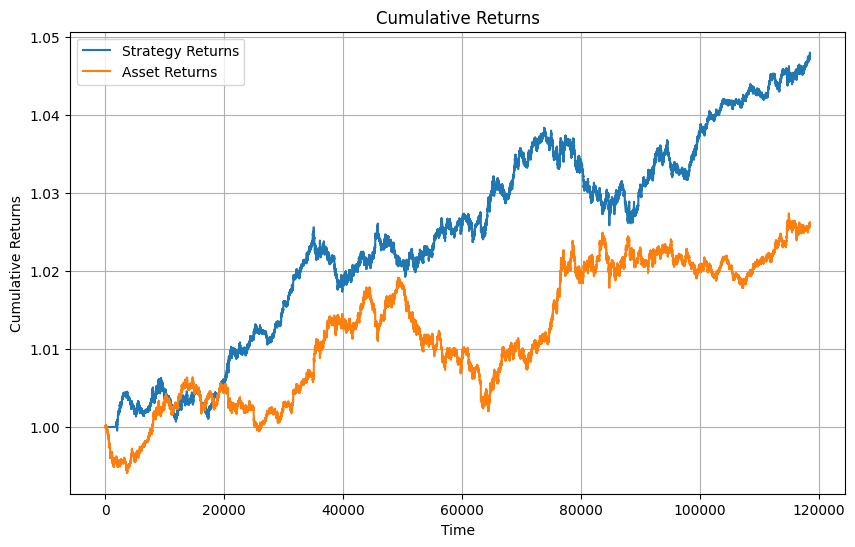

----------------------------------------------------------------
Strategy info by model Dual Thrust Strategy
Cumulative Return: 4.79%
Sharpe Ratio: 18.37
Max Drawdown: 1.20%
Win Ratio: 50.20%
Annual Return: 215.73%
Annual Volatility: 11.75%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [110]:
desc = 'Dual Thrust Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## `ATRStrategy` Class:

The `ATRStrategy` class implements a trading strategy based on the Average True Range (ATR). Here's an overview of its functionality:

1. **Initialization:**
   - Upon initialization, the class requires a DataFrame containing high-frequency futures price and volume data, along with two parameters:
     - `lookback`: Number of periods to look back for calculating the ATR.
     - `multiplier`: Multiplier for the ATR to determine the threshold.

2. **Calculate ATR:**
   - The `calculate_atr` method computes the Average True Range (ATR).
   - It calculates the True Range (`tr`) as the maximum of:
     - The absolute difference between high and low prices.
     - The absolute difference between high price and the previous close.
     - The absolute difference between low price and the previous close.
   - ATR is then calculated as the rolling mean of True Range over the specified lookback period.

3. **Generate Signals:**
   - The `generate_signals` method generates buy and sell signals based on the ATR strategy.
   - It initializes columns `'buy_signal'` and `'sell_signal'` in the DataFrame to store the generated signals.
   - It iterates over each data point in the DataFrame starting from the lookback period.
   - If the high price exceeds the previous close plus `multiplier` times the ATR, it generates a buy signal.
   - If the low price falls below the previous close minus `multiplier` times the ATR, it generates a sell signal.
   - The final signal is the sum of buy and sell signals, stored in a column named `'signal'`.

4. **Run Method:**
   - The `run` method executes the ATR strategy by calling `calculate_atr` and `generate_signals`.
   - It returns the DataFrame with the calculated ATR and generated signals.

5. **Progress Bar:**
   - During signal generation, a tqdm progress bar tracks the process.

In [144]:
import pandas as pd
from tqdm import tqdm

class ATRStrategy:
    def __init__(self, data, lookback=14, multiplier=3):
        """
        Initialize the ATR class.
        
        :param data: DataFrame containing the high-frequency futures price and volume data
        :param lookback: Number of periods to look back for calculating the ATR (default: 14)
        :param multiplier: Multiplier for the ATR to determine the threshold (default: 3)
        """
        self.data = data
        self.lookback = lookback
        self.multiplier = multiplier
    
    def calculate_atr(self):
        """
        Calculate the Average True Range (ATR).
        """
        self.data['high'] = self.data['ask5']
        self.data['low'] = self.data['bid5']
        self.data['close'] = self.data['mid']
        
        self.data['tr1'] = abs(self.data['high'] - self.data['low'])
        self.data['tr2'] = abs(self.data['high'] - self.data['close'].shift())
        self.data['tr3'] = abs(self.data['low'] - self.data['close'].shift())
        
        self.data['tr'] = self.data[['tr1', 'tr2', 'tr3']].max(axis=1)
        self.data['atr'] = self.data['tr'].rolling(self.lookback).mean()
    
    def generate_signals(self):
        """
        Generate the buy and sell signals based on the ATR strategy.
        """
        self.data['buy_signal'] = 0
        self.data['sell_signal'] = 0
        
        for i in tqdm(range(self.lookback, len(self.data))):
            if self.data['high'][i] > self.data['close'][i-1] + self.multiplier * self.data['atr'][i-1]:
                self.data.at[i, 'buy_signal'] = -1
            elif self.data['low'][i] < self.data['close'][i-1] - self.multiplier * self.data['atr'][i-1]:
                self.data.at[i, 'sell_signal'] = 1
        
        self.data['signal'] = self.data['buy_signal'] + self.data['sell_signal']
    
    def run(self):
        """
        Run the ATR strategy.
        """
        self.calculate_atr()
        self.generate_signals()
        
        return self.data

In [181]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = ATRStrategy(data=test.reset_index(drop=True), lookback=30, multiplier=0.8)
signal_atr = strategy.run()

100%|██████████| 118446/118446 [00:01<00:00, 66322.13it/s]


In [182]:
signals = signal_atr['signal'].values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 2311
The number of predicted label 0: 113919
The number of predicted label -1: 2246


In [185]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 409307.24it/s]


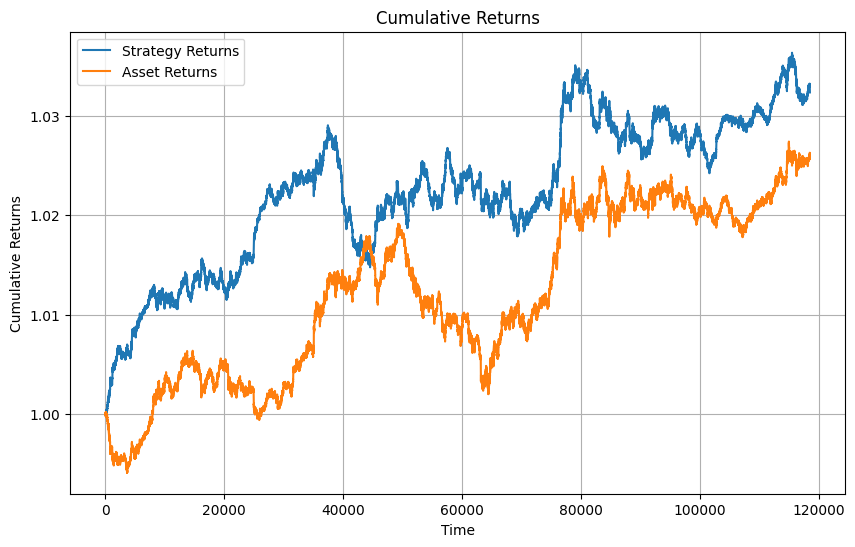

----------------------------------------------------------------
Strategy info by model ATR Strategy
Cumulative Return: 3.23%
Sharpe Ratio: 12.38
Max Drawdown: 1.39%
Win Ratio: 50.52%
Annual Return: 146.94%
Annual Volatility: 11.87%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [186]:
desc = 'ATR Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

## Some Strategies to be completed ...

In [192]:
import pandas as pd
from tqdm import tqdm

class RBreakerStrategy:
    def __init__(self, data, k1, k2):
        """
        Initialize the RBreaker class.
        
        :param data: DataFrame containing the high-frequency futures price and volume data
        """
        self.data = data
        self.k1 = k1
        self.k2 = k2
    
    def calculate_levels(self):
        """
        Calculate the R-Breaker levels.
        """
        self.data['high'] = self.data['ask5'].shift()
        self.data['low'] = self.data['bid5'].shift()
        self.data['close'] = self.data['mid'].shift()
        
        self.data['pivot'] = (self.data['high'] + self.data['low'] + self.data['close']) / 3
        self.data['bbreak'] = self.data['high'] + self.k1 * (self.data['pivot'] - self.data['low'])
        self.data['ssetup'] = self.data['pivot'] + (self.data['high'] - self.data['low'])
        self.data['senter'] = self.k2 * self.data['pivot'] - self.data['low']
        self.data['benter'] = self.k2 * self.data['pivot'] - self.data['high']
        self.data['bsetup'] = self.data['pivot'] - (self.data['high'] - self.data['low'])
        self.data['sbreak'] = self.data['low'] - self.k1 * (self.data['high'] - self.data['pivot'])
    
    def generate_signals(self):
        """
        Generate the buy and sell signals based on the R-Breaker strategy.
        """
        self.data['buy_signal'] = 0
        self.data['sell_signal'] = 0
        
        for i in tqdm(range(1, len(self.data))):
            if self.data['mid'][i] > self.data['bbreak'][i]:
                self.data.at[i, 'buy_signal'] = 1
            elif self.data['mid'][i] < self.data['sbreak'][i]:
                self.data.at[i, 'sell_signal'] = -1
            elif self.data['mid'][i] > self.data['ssetup'][i]:
                if self.data['mid'][i] < self.data['bbreak'][i] and self.data['mid'][i-1] > self.data['ssetup'][i-1]:
                    self.data.at[i, 'sell_signal'] = -1
            elif self.data['mid'][i] < self.data['bsetup'][i]:
                if self.data['mid'][i] > self.data['sbreak'][i] and self.data['mid'][i-1] < self.data['bsetup'][i-1]:
                    self.data.at[i, 'buy_signal'] = 1
        
        self.data['signal'] = self.data['buy_signal'] + self.data['sell_signal']
    
    def run(self):
        """
        Run the R-Breaker strategy.
        """
        self.calculate_levels()
        self.generate_signals()
        
        return self.data

In [201]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = RBreakerStrategy(data=test.reset_index(drop=True), k1=0.0001, k2=0.0001)
signal_rb = strategy.run()

  0%|          | 0/118475 [00:00<?, ?it/s]

100%|██████████| 118475/118475 [00:02<00:00, 58044.79it/s]


In [202]:
signals = signal_rb['signal'].values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 18
The number of predicted label 0: 118443
The number of predicted label -1: 15


In [ ]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

In [ ]:
desc = 'ATR Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

In [58]:
import numpy as np
from tqdm import tqdm

class EMDReversion:
    def __init__(self, data, window_size=2460, threshold_multiplier=3.9, stop_loss=0.006):
        """
        Initialize the EMDReversion class.

        Args:
            data (pandas.DataFrame): Input data containing price and volume information.
            window_size (int): Size of the window for calculating EMD (default: 2460, which is approximately 41 minutes for second-level data).
            threshold_multiplier (float): Multiplier for the EMD threshold (default: 3.9).
            stop_loss (float): Stop loss threshold (default: 0.006).
        """
        self.data = data
        self.window_size = window_size
        self.threshold_multiplier = threshold_multiplier
        self.stop_loss = stop_loss
        self.signals = np.zeros(len(data))

    def _get_pivot_points(self, high, low, close):
        """
        Calculate pivot points based on high, low, and close prices.

        Args:
            high (float): High price.
            low (float): Low price.
            close (float): Close price.

        Returns:
            dict: Dictionary containing pivot points.
        """
        pivot = (high + low) / 2
        r1 = 2 * pivot - low
        s1 = 2 * pivot - high
        r2 = pivot + (r1 - s1)
        s2 = pivot - (r1 - s1)
        r3 = high + 2 * (pivot - low)
        s3 = low - 2 * (high - pivot)
        return {'pivot': pivot, 'r1': r1, 's1': s1, 'r2': r2, 's2': s2, 'r3': r3, 's3': s3}

    def _get_emd_threshold(self, data):
        """
        Calculate the EMD threshold based on the mean of log energy ratios.

        Args:
            data (numpy.ndarray): Input data for calculating the threshold.

        Returns:
            float: EMD threshold.
        """
        diffs = np.abs(np.diff(data))
        std_diffs = np.std(diffs)
        std_prices = np.std(data)
        log_energy_ratio = np.log(std_diffs / std_prices)
        return np.mean(log_energy_ratio) * self.threshold_multiplier

    def generate_signals(self):
        """
        Generate trading signals based on the EMD reversion strategy.
        """
        print("Generating signals...")
        for i in tqdm(range(self.window_size, len(self.data))):
            window_data = self.data.iloc[i - self.window_size:i]
            high, low, close = window_data['ask5'], window_data['bid5'], window_data['mid']
            
            # Calculate EMD threshold
            threshold = self._get_emd_threshold(close)
            # print(threshold)
            # print(np.log(np.std(np.diff(close)) / np.std(close)))
            # sys.exit()

            # Check if the market is in a strong oscillation state
            if np.log(np.std(np.diff(close)) / np.std(close)) >= threshold:
                # Calculate pivot points
                pivot_points = self._get_pivot_points(high.iloc[-1], low.iloc[-1], close.iloc[-1])
                
                # Generate signals based on pivot points
                if close.iloc[-1] > pivot_points['s2'] and self.signals[i - 1] != 1:
                    self.signals[i] = 1  # Buy signal
                elif close.iloc[-1] < pivot_points['r2'] and self.signals[i - 1] != -1:
                    self.signals[i] = -1  # Sell signal
                    
                # Stop loss
                if self.signals[i] == 1 and (close.iloc[-1] - close.iloc[-2]) / close.iloc[-2] < -self.stop_loss:
                    self.signals[i] = 0  # Close long position
                elif self.signals[i] == -1 and (close.iloc[-2] - close.iloc[-1]) / close.iloc[-2] < -self.stop_loss:
                    self.signals[i] = 0  # Close short position
        
        print("Signal generation completed.")
        
        return self.signals

In [61]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = EMDReversion(data=test.reset_index(drop=True), window_size=2460, threshold_multiplier=0.75, stop_loss=1e-4)
signal_emd = strategy.generate_signals()

Generating signals...


  0%|          | 0/116016 [00:00<?, ?it/s]

100%|██████████| 116016/116016 [00:20<00:00, 5615.68it/s]

Signal generation completed.


In [62]:
signals = signal_emd
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 0
The number of predicted label 0: 118476
The number of predicted label -1: 0


In [ ]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-5, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

In [ ]:
desc = 'Bid Ask Volume Anomaly Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

In [240]:
import pandas as pd
import numpy as np
from tqdm import tqdm

class ConvergenceBreakoutStrategy:
    def __init__(self, data, N1=26, N2=7, alpha=5):
        self.data = data
        self.N1 = N1
        self.N2 = N2
        self.alpha = alpha

    def calculate_signals(self):
        # Calculate price volatility
        self.data['volatility'] = self.data['mid'].rolling(window=self.N1).std()
        print(self.data['volatility'])

        # Calculate upper and lower envelopes
        self.data['upper_envelope'] = self.data['ask5'].rolling(window=self.N1).min()
        self.data['lower_envelope'] = self.data['bid5'].rolling(window=self.N1).max()
        print(self.data['upper_envelope'])
        print(self.data['lower_envelope'])
        print(self.data['mid'])

        # Initialize signals
        self.data['signal'] = 0

        # Iterate through the data to generate signals
        for i in tqdm(range(self.N1, len(self.data))):
            # Check for low volatility condition
            if self.data['volatility'].iloc[i-self.N2:i].min() < self.alpha:
                # Check for upward breakout
                if self.data['mid'].iloc[i] > self.data['upper_envelope'].iloc[i]:
                    self.data.at[self.data.index[i], 'signal'] = 1
                # Check for downward breakout
                elif self.data['mid'].iloc[i] < self.data['lower_envelope'].iloc[i]:
                    self.data.at[self.data.index[i], 'signal'] = -1

        return self.data['signal']

In [241]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = ConvergenceBreakoutStrategy(data=test.reset_index(drop=True), N1=10000, N2=50, alpha=5.0)
signal_cbs = strategy.calculate_signals()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
118471    8.015210
118472    8.014739
118473    8.014309
118474    8.013878
118475    8.013480
Name: volatility, Length: 118476, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
118471    4084.8
118472    4084.8
118473    4084.8
118474    4084.8
118475    4084.8
Name: upper_envelope, Length: 118476, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
118471    4114.6
118472    4114.6
118473    4114.6
118474    4114.6
118475    4114.6
Name: lower_envelope, Length: 118476, dtype: float64
0         4006.2
1         4006.1
2         4005.9
3         4006.1
4         4006.0
           ...  
118471    4109.8
118472    4110.3
118473    4110.5
118474    4110.5
118475    4110.5
Name: mid, Length: 118476, dtype: float64


100%|██████████| 108476/108476 [00:03<00:00, 30111.37it/s]


In [239]:
signals = signal_cbs.values
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 0
The number of predicted label 0: 118476
The number of predicted label -1: 0


In [ ]:
backtest = Backtest(initial_capital=1e6, commission_rate=1e-6, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

In [ ]:
desc = 'RSI-based High Freq Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

In [169]:
import pandas as pd
import numpy as np
from tqdm import tqdm

class OpeningRangeBreakout:
    def __init__(self, data, window_size, f, r, method='DRange'):
        """
        Initialize the OpeningRangeBreakout class.

        Args:
            data (pd.DataFrame): Input data containing price and volume information.
            window_size (int): Size of the opening range window.
            f (float): Range multiplier for calculating breakout levels.
            r (float): Stop loss percentage.
            method (str): Method for calculating range width ('DRange', 'ATR', or 'Open').
        """
        self.data = data
        self.window_size = window_size
        self.f = f
        self.r = r
        self.method = method

    def calculate_drange(self, high, low, close):
        """
        Calculate the DRange based on high, low, and close prices.

        Args:
            high (float): High price.
            low (float): Low price.
            close (float): Close price.

        Returns:
            float: Calculated DRange value.
        """
        return np.maximum(high - close, close - low)

    def calculate_atr(self, high, low, close, window):
        """
        Calculate the Average True Range (ATR) based on high, low, and close prices.

        Args:
            high (pd.Series): High price series.
            low (pd.Series): Low price series.
            close (pd.Series): Close price series.
            window (int): ATR window size.

        Returns:
            pd.Series: Calculated ATR series.
        """
        tr = pd.concat([high - low, abs(high - close.shift(1)), abs(low - close.shift(1))], axis=1).max(axis=1)
        return tr.rolling(window=window).mean()

    def generate_signals(self):
        """
        Generate long and short signals based on the Opening Range Breakout strategy.

        Returns:
            pd.DataFrame: DataFrame containing the generated signals.
        """
        data = self.data.copy()
        open_price = data['last_price'].iloc[0]
        high = data['ask5']
        low = data['bid5']
        close = data['mid']

        if self.method == 'DRange':
            range_width = self.calculate_drange(high, low, close)
        elif self.method == 'ATR':
            range_width = self.calculate_atr(high, low, close, self.window_size)
        else:
            range_width = open_price * self.f

        upper_bound = open_price + range_width * self.f
        lower_bound = open_price - range_width * self.f

        signals = pd.DataFrame(index=data.index, columns=['Signal'])
        position = 0
        stop_loss = 0

        for i in tqdm(range(len(data)), desc='Generating signals'):
            if position == 0:
                if close[i] > upper_bound[i]:
                    position = 1
                    stop_loss = close[i] * (1 - self.r)
                    signals['Signal'][i] = 1
                elif close[i] < lower_bound[i]:
                    position = -1
                    stop_loss = close[i] * (1 + self.r)
                    signals['Signal'][i] = -1
            else:
                if position == 1:
                    if close[i] < stop_loss:
                        position = 0
                        signals['Signal'][i] = 0
                else:
                    if close[i] > stop_loss:
                        position = 0
                        signals['Signal'][i] = 0

        signals['Signal'].fillna(0, inplace=True)
        return signals

In [170]:
# Assuming your data is stored in a DataFrame called 'df'
strategy = OpeningRangeBreakout(data=test.reset_index(drop=True), window_size=120, f=0.01, r=0.0001, method='DRange')
# strategy = OpeningRangeBreakout(data=test.reset_index(drop=True), window_size=120, f=0.0001, r=0.000001, method='ATR')
signal_orb_dr = strategy.generate_signals()

Generating signals: 100%|██████████| 118476/118476 [00:00<00:00, 983414.69it/s]


In [171]:
signals = signal_orb_dr.values.reshape(-1)
print(f"The number of predicted label 1: {sum(signals == 1)}")
print(f"The number of predicted label 0: {sum(signals == 0)}")
print(f"The number of predicted label -1: {sum(signals == -1)}")

The number of predicted label 1: 10
The number of predicted label 0: 118458
The number of predicted label -1: 8


In [172]:
# backtest = Backtest(initial_capital=1e6, commission_rate=0, price_=test_price[:50000], return_=test_return[:50000], signal_=signals)
backtest = Backtest(initial_capital=1e6, commission_rate=0, price_=test_price, return_=test_return, signal_=signals)
backtest.run()
backtest.save_log('Backtest_log.txt')

Backtest Progress: 100%|██████████| 118476/118476 [00:00<00:00, 433514.23it/s]


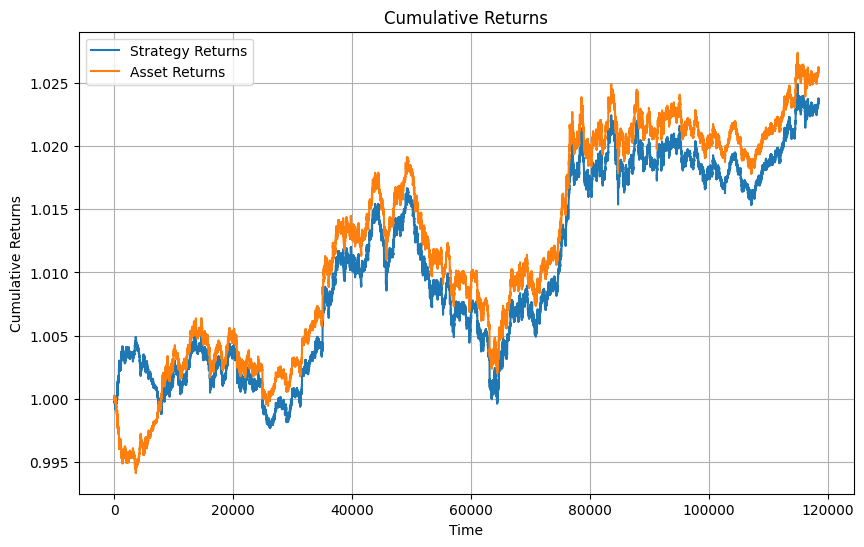

----------------------------------------------------------------
Strategy info by model Opening Range Breakout DRange Strategy
Cumulative Return: 2.36%
Sharpe Ratio: 9.06
Max Drawdown: 1.68%
Win Ratio: 50.04%
Annual Return: 107.66%
Annual Volatility: 11.88%
----------------------------------------------------------------
Return info by underlying asset (benchmark)
Cumulative Return: 2.60%
Sharpe Ratio: 10.00
Max Drawdown: 1.68%
Win Ratio: 50.24%
Annual Return: 118.79%
Annual Volatility: 11.88%


In [173]:
desc = 'Opening Range Breakout DRange Strategy'
backtest.plot_cumulative_returns(desc=desc)
backtest.calculate_metrics()
backtest.print_metrics(desc=desc)

In [ ]:
import pandas as pd
from tqdm import tqdm

class FialiFourPrice:
    def __init__(self, data):
        """
        Initialize the FialiFourPrice class.
        
        :param data: DataFrame containing the high-frequency futures price and volume data
        """
        self.data = data
    
    def calculate_levels(self):
        """
        Calculate the Fiali Four-Price levels.
        """
        self.data['high'] = self.data['ask5'].shift()
        self.data['low'] = self.data['bid5'].shift()
        self.data['close'] = self.data['mid'].shift()
        self.data['open'] = self.data['mid']
        
        self.data['upper'] = self.data['high']
        self.data['lower'] = self.data['low']
    
    def generate_signals(self):
        """
        Generate the buy and sell signals based on the Fiali Four-Price strategy.
        """
        self.data['buy_signal'] = 0
        self.data['sell_signal'] = 0
        
        for i in tqdm(range(1, len(self.data))):
            if self.data['mid'][i] > self.data['upper'][i]:
                self.data.at[i, 'buy_signal'] = 1
            elif self.data['mid'][i] < self.data['lower'][i]:
                self.data.at[i, 'sell_signal'] = -1
        
        self.data['signal'] = self.data['buy_signal'] + self.data['sell_signal']
    
    def run(self):
        """
        Run the Fiali Four-Price strategy.
        """
        self.calculate_levels()
        self.generate_signals()
        
        return self.data

In [ ]:
import pandas as pd
from tqdm import tqdm

class SkyGarden:
    def __init__(self, data, gap_threshold=0.01):
        """
        Initialize the SkyGarden class.
        
        :param data: DataFrame containing the high-frequency futures price and volume data
        :param gap_threshold: Threshold for determining a gap (default: 0.01)
        """
        self.data = data
        self.gap_threshold = gap_threshold
    
    def calculate_levels(self):
        """
        Calculate the Sky Garden levels.
        """
        self.data['high'] = self.data['ask5'].shift()
        self.data['low'] = self.data['bid5'].shift()
        self.data['close'] = self.data['mid'].shift()
        self.data['open'] = self.data['mid']
        
        self.data['gap_up'] = (self.data['open'] - self.data['close']) / self.data['close'] > self.gap_threshold
        self.data['gap_down'] = (self.data['close'] - self.data['open']) / self.data['close'] > self.gap_threshold
        
        self.data['upper'] = self.data['high'].where(self.data['gap_up'], self.data['open'])
        self.data['lower'] = self.data['low'].where(self.data['gap_down'], self.data['open'])
    
    def generate_signals(self):
        """
        Generate the buy and sell signals based on the Sky Garden strategy.
        """
        self.data['buy_signal'] = 0
        self.data['sell_signal'] = 0
        
        for i in tqdm(range(1, len(self.data))):
            if self.data['gap_up'][i]:
                if self.data['mid'][i] > self.data['upper'][i]:
                    self.data.at[i, 'buy_signal'] = 1
            elif self.data['gap_down'][i]:
                if self.data['mid'][i] < self.data['lower'][i]:
                    self.data.at[i, 'sell_signal'] = -1
        
        self.data['signal'] = self.data['buy_signal'] + self.data['sell_signal']
    
    def run(self):
        """
        Run the Sky Garden strategy.
        """
        self.calculate_levels()
        self.generate_signals()
        
        return self.data